# Import the Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Define the file path
#File = 'Data_Households_SmartPV'
#File = 'Average_household_energy'

#avg_energy_df = pd.read_csv('Average_household_energy.csv')
raw_df = pd.read_csv('Data_Households_SmartPV.csv')

raw_df['Timestamp'] = pd.to_datetime(raw_df['Timestamp'])
raw_df .info()
print(raw_df.head())  # This will print the first 5 rows of the DataFrame


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1187562 entries, 0 to 1187561
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Timestamp    1187562 non-null  datetime64[ns]
 1   NM_meter     1187562 non-null  int64         
 2   Import       1187562 non-null  float64       
 3   Export       1187562 non-null  float64       
 4   PV_meter     1187562 non-null  int64         
 5   Production   1187562 non-null  float64       
 6   Consumption  1187562 non-null  float64       
 7   NetLoad      1187562 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 72.5 MB
            Timestamp  NM_meter   Import  Export  PV_meter  Production  \
0 2016-01-01 00:00:00       575  1015.20     0.0       473         0.0   
1 2016-01-01 00:30:00       575   774.03     0.0       473         0.0   
2 2016-01-01 01:00:00       575   718.30     0.0       473         0.0   
3 2016-01-01

# Data Pre-Processing:
Make the appropriate dataframes
and get the selected arrays

We can take average data or aggregated,
or even individual house, as case study




In [3]:
### Yearly Average Energy
yearly_avg_df = raw_df.groupby(['Timestamp', 'month']).mean().reset_index() # I don't understand why month
#yearly_avg_f = raw_df.groupby(['Timestamp', 'month']).sum().reset_index()
yearly_avg_df.info()
yearly_avg_df.head()

### Monthly Avg
#monthly_df = raw_df.groupby(['month','PV_meter']).mean().reset_index()
monthly_df = raw_df.groupby(['month']).mean()
months_of_the_year = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
#print(months_of_the_year)

### Daily Avg
hourly_df = raw_df.groupby(['hour_of_day']).mean()

### Weekday / Weekend Avg
#raw_df2 = raw_df
#raw_df2['day_type'] = raw_df2['Timestamp'].dt.dayofweek.apply(lambda x: 'Weekend' if x > 4 else 'Weekday')
#weekly_df = raw_df2.groupby(['quarter','day_type']).mean()
weekly_df = raw_df.groupby(['day_of_week']).mean()
weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
week = ["weekday","weekend"]



KeyError: 'month'

PLOTS

/var/folders/gb/sjxj389901n7jtz0mzqvm0xr0000gn/T/ipykernel_65854/469324228.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


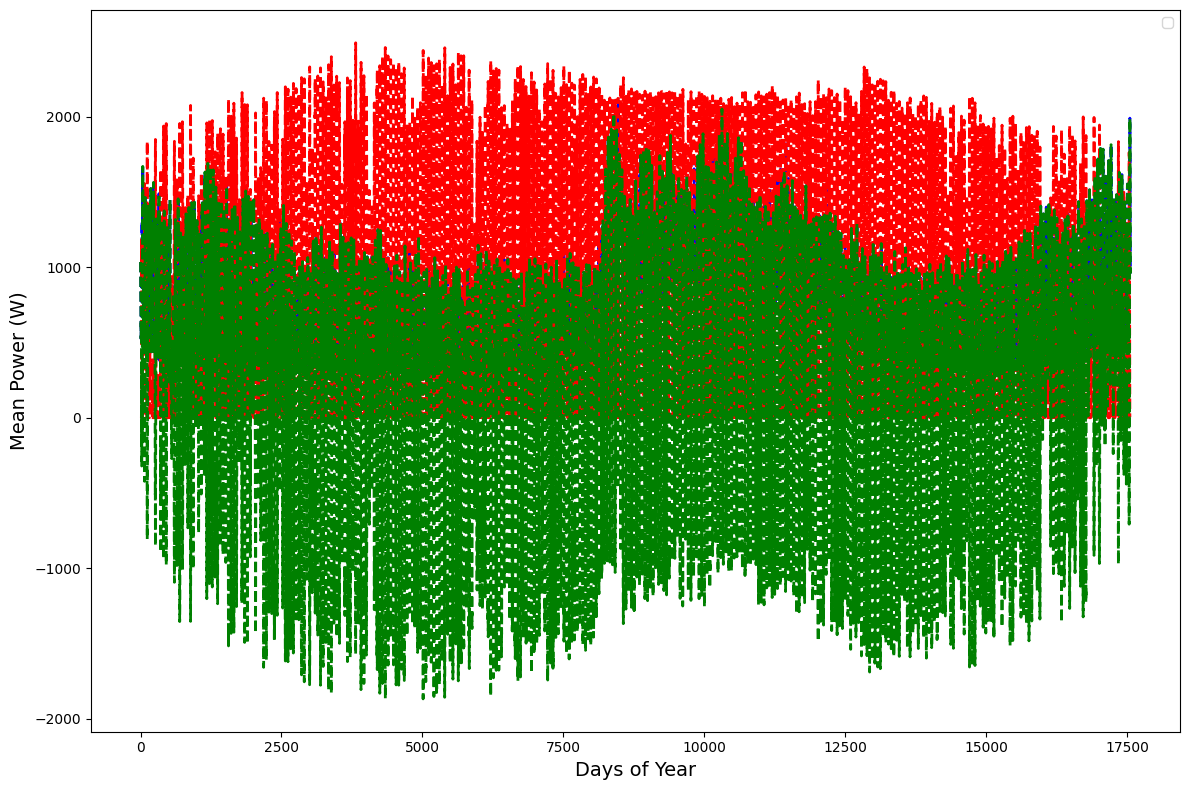

In [51]:
### Plot yearly
# Plot Prod, Cons and Net vs days
plt.figure(figsize=(12, 8))
plt.plot( yearly_avg_df['Consumption'], linestyle='--',linewidth=2, color='blue')
plt.plot( yearly_avg_df['Production'], linestyle='--',linewidth=2, color='red')
plt.plot( yearly_avg_df['NetLoad'],  linestyle='--',linewidth=2, color='green')

# Set the labels and title
plt.xlabel('Days of Year',  fontsize=14)
plt.ylabel('Mean Power (W)',  fontsize=14)
plt.legend( labels=['Consumption', 'Production', 'NetLoad'])
plt.legend()
plt.tight_layout()  # Auto-adjust layout to prevent clipping of labels

# Show the plot
plt.show()

<Axes: xlabel='month', ylabel='Consumption'>

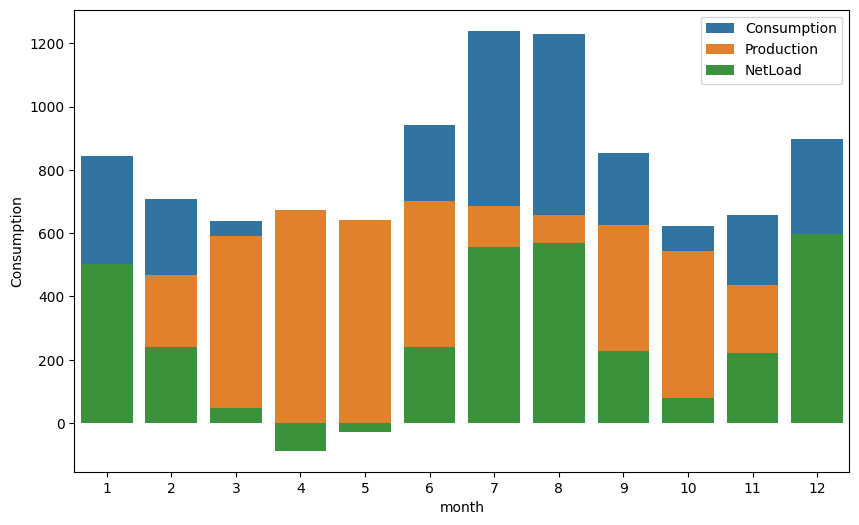

In [52]:
# Set the figure size
plt.figure(figsize=(10, 6))
# Create the bar plot
sns.barplot(x='month', y='Consumption', data=monthly_df, label='Consumption')
sns.barplot(x='month', y='Production', data=monthly_df, label='Production')
sns.barplot(x='month', y='NetLoad', data=monthly_df, label='NetLoad')


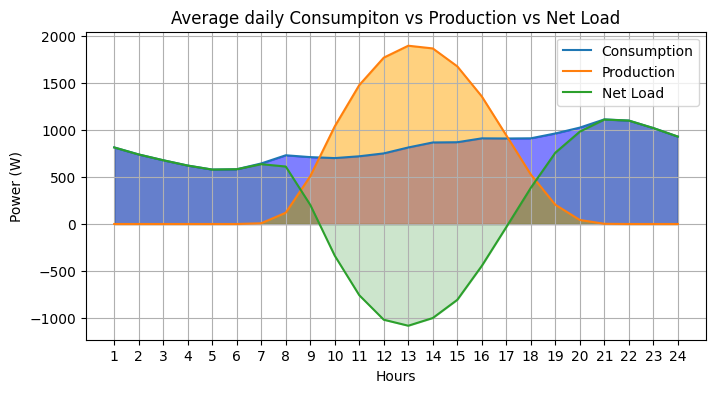

In [53]:
# Set the figure size
plt.figure(figsize=(8, 4))
hours = list(range(1, 25))

# Plot
plt.plot(hours, hourly_df['Consumption'], linestyle='-', label='Consumption')
plt.fill_between(hours, hourly_df['Consumption'], color='blue', alpha=0.5)  # Add shading under the Consumption curve

plt.plot(hours, hourly_df['Production'], linestyle='-', label='Production')
plt.fill_between(hours, hourly_df['Production'], color='orange', alpha=0.5)  # Add shading under the Production curve

plt.plot(hours, hourly_df['NetLoad'], linestyle='-', label='Net Load')
plt.fill_between(hours, hourly_df['NetLoad'], color='green', alpha=0.2)  # Add shading under the Net Load curve

# Set the labels and title
plt.xlabel('Hours'); plt.ylabel('Power (W)')
plt.title('Average daily Consumpiton vs Production vs Net Load')
plt.legend()
# Set custom x-axis tick labels
plt.xticks(hours);  plt.grid();
# Show the plot
plt.show();

week number: 33


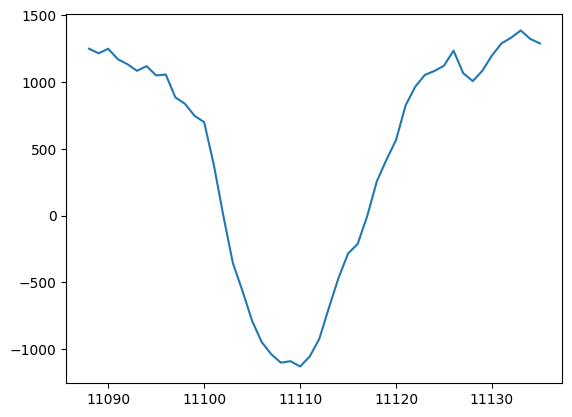

In [54]:
#Plot Net load in a random week / random day
import random
random_number = random.randint(1, 52)
print("week number:",random_number)

week_nr = random_number
#plt.plot(yearly_avg_df['Consumption'].iloc[48*7*week_nr:48*7*(week_nr+1)])

# plot a week
#plt.plot(yearly_avg_df['NetLoad'].iloc[48*7*week_nr:48*7*(week_nr+1)])
# plot a day
plt.plot(yearly_avg_df['NetLoad'].iloc[48*7*week_nr:48*7*week_nr+48])

In [55]:
## Get the daily data in array form
Production = hourly_df['Production'].values
Consumption = hourly_df['Consumption'].values
NetLoad =  hourly_df['NetLoad'].values


Interpolation for daytime. To add more points in the graph

In [56]:
##  Interpolation of Load
from scipy.interpolate import interp1d
# interpolate to get values for 1440 minutes/day (24 hours = 1440 minutes)
x = np.linspace(1,24,24)
v = Consumption
xq = np.linspace(1,24,24*60)
vq = np.interp(xq, x, v)
print(x)

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24.]


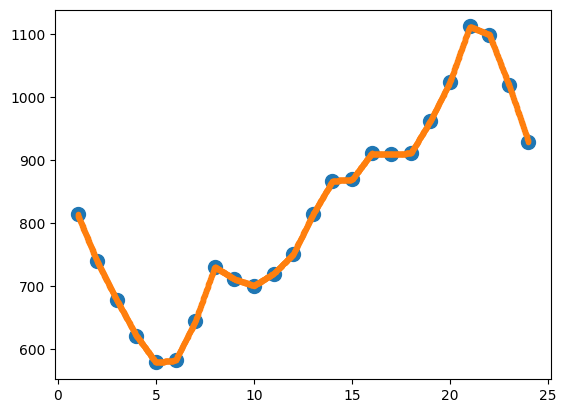

In [57]:
# Plot interpolated
plt.plot(x, v, 'o--',  label='Consumption',markersize=10 )
plt.plot(xq, vq,  '.-.', label='Interpolated')

# Load the dates & Define Battery Parameters

Load the dates

In [58]:
yearly_avg_df = yearly_avg_df.set_index('Timestamp')

In [59]:
# Get Specific Days data
#yearly_avg_df = yearly_avg_df.set_index('Timestamp')
yearly_avg_df.index = pd.to_datetime(yearly_avg_df.index)

# Filter for ONE specific days (Example: January 1st, 2016)
specific_days_df = yearly_avg_df.loc[(yearly_avg_df.index.date == pd.to_datetime('2016-07-08').date())]

# Filter for TWO specific days (Example: January 1st and 2nd, 2016)
#specific_days_df = yearly_avg_df.loc[(yearly_avg_df.index.date == pd.to_datetime('2016-07-08').date()) |
#                                     (yearly_avg_df.index.date == pd.to_datetime('2016-07-09').date())]

# CHANGE HOURLY DATA TO SPECIFIC DAY
#specific_days_df.index = pd.to_datetime(specific_days_df.index)
hourly_df = specific_days_df.resample('H').mean()
hourly_df.info()
hourly_df.tail(20)


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24 entries, 2016-07-08 00:00:00 to 2016-07-08 23:00:00
Freq: h
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   month        24 non-null     float64
 1   NM_meter     24 non-null     float64
 2   Import       24 non-null     float64
 3   Export       24 non-null     float64
 4   PV_meter     24 non-null     float64
 5   Production   24 non-null     float64
 6   Consumption  24 non-null     float64
 7   NetLoad      24 non-null     float64
 8   day          24 non-null     float64
 9   day_of_week  24 non-null     float64
 10  year         24 non-null     float64
 11  hour_of_day  24 non-null     float64
 12  quarter      24 non-null     float64
dtypes: float64(13)
memory usage: 2.6 KB


/var/folders/gb/sjxj389901n7jtz0mzqvm0xr0000gn/T/ipykernel_65854/478287723.py:14: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_df = specific_days_df.resample('H').mean()


,month,NM_meter,Import,Export,PV_meter,Production,Consumption,NetLoad,day,day_of_week,year,hour_of_day,quarter
Timestamp,,,,,,,,,,,,,
2016-07-08 04:00:00,7.0,614.941176,1311.790515,0.000000,586.632353,0.000000,1311.790515,1311.790515,8.0,4.0,2016.0,4.0,3.0
2016-07-08 05:00:00,7.0,614.941176,1215.250221,0.000000,586.632353,0.000147,1215.250368,1215.250221,8.0,4.0,2016.0,5.0,3.0
2016-07-08 06:00:00,7.0,614.941176,1154.206397,0.263529,586.632353,21.426985,1175.369853,1153.942868,8.0,4.0,2016.0,6.0,3.0
2016-07-08 07:00:00,7.0,615.843723,929.129680,12.273800,587.316176,184.062502,1100.918381,916.855879,8.0,4.0,2016.0,7.0,3.0
2016-07-08 08:00:00,7.0,616.746269,563.610373,142.571269,588.000000,582.401493,1003.440597,421.039104,8.0,4.0,2016.0,8.0,3.0
2016-07-08 09:00:00,7.0,617.206468,256.630640,501.689041,588.500000,1116.178040,871.119639,-245.058401,8.0,4.0,2016.0,9.0,3.0
2016-07-08 10:00:00,7.0,614.941176,113.504632,906.077647,586.632353,1573.920368,781.347353,-792.573015,8.0,4.0,2016.0,10.0,3.0
2016-07-08 11:00:00,7.0,614.941176,120.129191,1158.428088,586.632353,1900.758088,862.459191,-1038.298897,8.0,4.0,2016.0,11.0,3.0
2016-07-08 12:00:00,7.0,614.941176,116.760588,1293.355588,586.632353,2087.656765,911.061765,-1176.595000,8.0,4.0,2016.0,12.0,3.0


In [60]:
### Load Data #####
# For two summer days (peak production)
hourly_df = hourly_df.reset_index(drop=True)
#hourly_df = yearly_avg_df.resample('H').mean().fillna(hourly_df.mean()).reset_index(drop=True)

Production = hourly_df['Production']
Consumption = hourly_df['Consumption']
NetLoad =  hourly_df['NetLoad']
NetLoad.head()


0    1662.978529
1    1656.382868
2    1550.002794
3    1433.111103
4    1311.790515
Name: NetLoad, dtype: float64

In [61]:
print(hourly_df.isna().sum())


month          0
NM_meter       0
Import         0
Export         0
PV_meter       0
Production     0
Consumption    0
NetLoad        0
day            0
day_of_week    0
year           0
hour_of_day    0
quarter        0
dtype: int64


In [62]:
index=Production.index
index

RangeIndex(start=0, stop=24, step=1)

Battery Data
 https://midsummerwholesale.co.uk/pdfs/se-solaredge-home-battery-low-voltage-datasheet-eng-row.pdf

https://natec.com/wp-content/uploads/2020/12/6020-0205-Datasheet-LG-Chem-RESU-10H-High-Voltage-400V-type-C-for-SMA.pdf


In [63]:
# Specify battery Parameters. Source
# https://midsummerwholesale.co.uk/pdfs/se-solaredge-home-battery-low-voltage-datasheet-eng-row.pdf

'''
battery_capacity = 0.9*4600  # in Wh
max_charge_rate = 2800  # Max charge rate in W (power)
max_discharge_rate = 4000  # Max discharge rate in W (power)
soc_min = 0.1*battery_capacity  # Maximum Depth of Discharge 10%
battery_soc = soc_min  # Initial state of charge in Wh
eff = 0.98;  # Charge/discharge Efficiency of the battery
'''


# LG Resus 10H type-C
#https://natec.com/wp-content/uploads/2020/12/6020-0205-Datasheet-LG-Chem-RESU-10H-High-Voltage-400V-type-C-for-SMA.pdf
battery_capacity = 0.95*9800  # in Wh
max_charge_rate = 5000  # Max charge rate in W (power)
max_discharge_rate = 0.5*7000  # Max discharge rate in W (power)
soc_min = 0.05*battery_capacity  # Maximum Depth of Discharge 10%
battery_soc = soc_min  # Initial state of charge in Wh
eff = 0.98;  # Charge/discharge Efficiency of the battery
#


Time-of-Use Tarriffs (Indicative)
TOU tarrifs from Australia 2017 from paper:

https://www.researchgate.net/publication/317125126_Leveraging_smart_meter_data_for_economic_optimization_of_residential_photovoltaics_under_existing_tariff_structures_and_incentive_schemes


In [64]:
#https://www.researchgate.net/publication/317125126_Leveraging_smart_meter_data_for_economic_optimization_of_residential_photovoltaics_under_existing_tariff_structures_and_incentive_schemes

# Sample TOU tariff data
tariff_data = {
    'time_period': pd.date_range(start='2016-07-08 00:00:00', end='2016-07-08 23:00:00', freq='H'),
    'tariff_rate': [0.13, 0.13, 0.13, 0.13, 0.13, 0.13, 0.13, 0.13, 0.21, 0.21, 0.21, 0.21, 0.21, 0.21, 0.21, 0.53, 0.53, 0.53, 0.53, 0.53, 0.21, 0.21, 0.13, 0.13]
}

# Create the DataFrame
tariff_df = pd.DataFrame(tariff_data)
print(tariff_df )

           time_period  tariff_rate
0  2016-07-08 00:00:00         0.13
1  2016-07-08 01:00:00         0.13
2  2016-07-08 02:00:00         0.13
3  2016-07-08 03:00:00         0.13
4  2016-07-08 04:00:00         0.13
5  2016-07-08 05:00:00         0.13
6  2016-07-08 06:00:00         0.13
7  2016-07-08 07:00:00         0.13
8  2016-07-08 08:00:00         0.21
9  2016-07-08 09:00:00         0.21
10 2016-07-08 10:00:00         0.21
11 2016-07-08 11:00:00         0.21
12 2016-07-08 12:00:00         0.21
13 2016-07-08 13:00:00         0.21
14 2016-07-08 14:00:00         0.21
15 2016-07-08 15:00:00         0.53
16 2016-07-08 16:00:00         0.53
17 2016-07-08 17:00:00         0.53
18 2016-07-08 18:00:00         0.53
19 2016-07-08 19:00:00         0.53
20 2016-07-08 20:00:00         0.21
21 2016-07-08 21:00:00         0.21
22 2016-07-08 22:00:00         0.13
23 2016-07-08 23:00:00         0.13


/var/folders/gb/sjxj389901n7jtz0mzqvm0xr0000gn/T/ipykernel_65854/2457942373.py:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  'time_period': pd.date_range(start='2016-07-08 00:00:00', end='2016-07-08 23:00:00', freq='H'),


In [65]:
tariffs = tariff_df['tariff_rate']
result_df = tariffs * Consumption
result_df

0     216.187209
1     215.329773
2     201.500363
3     186.304443
4     170.532767
5     157.982548
6     152.798081
7     143.119390
8     210.722525
9     182.935124
10    164.082944
11    181.116430
12    191.322971
13    210.516399
14    259.322345
15    713.866392
16    707.036796
17    680.148026
18    676.662224
19    579.921246
20    266.555857
21    237.756565
22    154.576596
23    162.773975
dtype: float64

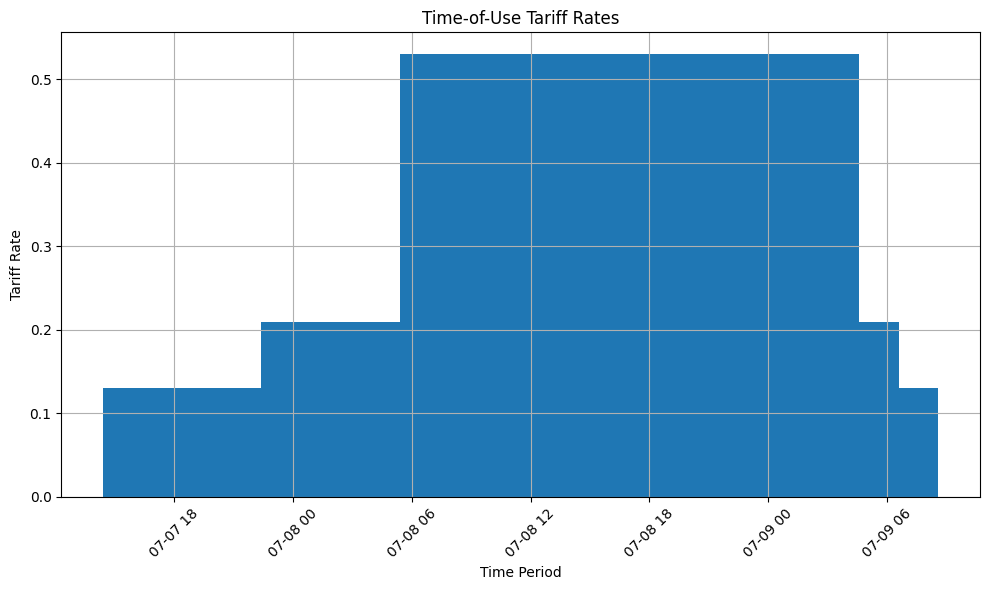

In [66]:
# Plot the tariff rate over time as a bar plot
plt.figure(figsize=(10, 6))
plt.bar(tariff_df['time_period'], tariff_df['tariff_rate'])
plt.xlabel('Time Period')
plt.ylabel('Tariff Rate')
plt.title('Time-of-Use Tariff Rates')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Simple Battery model (Rule-Based)
Simple Battery model
Objective:
**Minimize abs(NetLoad)**
= minimize peak consumption & maximise using PV generation

In [67]:
# Define the Rule-based controller for charging-discharging the battery

def simulate_battery_operation(pv, load, soc, capacity, charge_rate, discharge_rate, P_PV_used):
    dod = 0.1*battery_capacity
    net_load = load - pv  # Negative if excess PV

    if net_load < 0 :  # Charge when we have Excess PV
        charge_power = 0.98*min(-net_load, charge_rate, capacity - soc)
        soc += charge_power  # Charge the battery
        P_PV_used += load
        #net_load = 0  # Set net load to zero since it's handled by PV and battery
        net_load += charge_power  #
        discharge_power = 0

    else :  # If Net Load possitive
        discharge_power = 0.98*min(net_load, discharge_rate, soc )
        if soc <= 1.5*dod:              # Min SOC is at DoD
           discharge_power = 0
           soc = dod;

        soc -= discharge_power  # Discharge the battery
        P_PV_used += pv
        net_load -= discharge_power  # Reduce net load by the discharged amount
        charge_power = 0

    return soc, net_load , P_PV_used, charge_power, discharge_power

In [68]:
# Initialize DataFrame for results
results = pd.DataFrame(index=Production.index)
results['PV'] = Production
results['Load'] = Consumption
results['SOC'] = soc_min
results['P_PV_used'] = 0
results['Net Load'] = 0

# Run simulation
for i in results.index:
    battery_soc, net_load, P_PV_used,charge_power, discharge_power = simulate_battery_operation(results.at[i, 'PV'],
                                                                  results.at[i, 'Load'],
                                                                  battery_soc,
                                                                  battery_capacity,
                                                                  max_charge_rate,
                                                                  max_discharge_rate,
                                                                  results.at[i, 'P_PV_used'])
    results.at[i, 'SOC'] = battery_soc
    results.at[i, 'Net Load'] = net_load
    results.at[i, 'P_PV_used'] = P_PV_used
    results.at[i, 'Charging'] = charge_power
    results.at[i, 'Discharging'] = discharge_power


/var/folders/gb/sjxj389901n7jtz0mzqvm0xr0000gn/T/ipykernel_65854/1951886729.py:19: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1662.9785294117646' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  results.at[i, 'Net Load'] = net_load
/var/folders/gb/sjxj389901n7jtz0mzqvm0xr0000gn/T/ipykernel_65854/1951886729.py:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.00014705882352941178' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  results.at[i, 'P_PV_used'] = P_PV_used


# PLOTS

<Figure size 800x800 with 0 Axes>

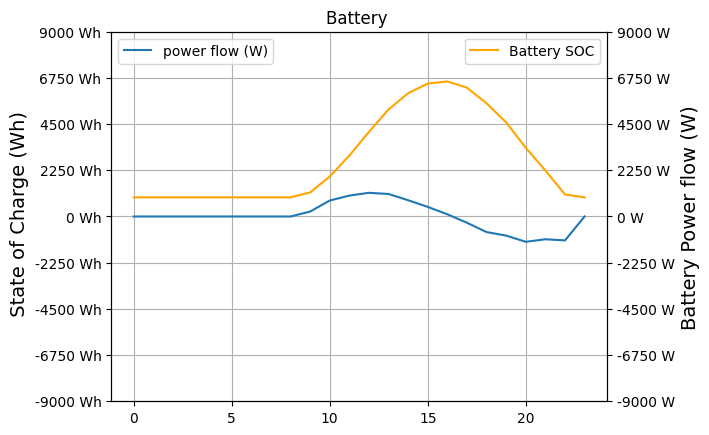

In [69]:
hours = len(Production)
timeframe = np.linspace(0,hours-1,hours)


def plot_soc1( timeframe, results ):
    # Create the figure and axes
    plt.plot(timeframe, results['SOC'], color='orange',  label='Battery SOC (Wh)' )
    plt.plot(timeframe, results['Charging']-results['Discharging'],   label='Battery Power flow (W)')

    plt.title('Battery ')
    plt.xlabel('Hour of day', fontsize=14);
    plt.legend(loc='upper left'); plt.grid();
    #plt.ylabel('Power flow (W)', fontsize=14)
    plt.show()


def plot_soc( timeframe, results ):  # Plot with two axes
    # Create the figure and axes
    plt.figure(figsize=(8, 8))
    fig, ax1 = plt.subplots()
    ax1.plot(timeframe, results['SOC'], color='orange',  label='Battery SOC' )
    ax1.set_ylabel(' State of Charge (Wh)' , fontsize=14)

    # Second axis:
    ax2 = ax1.twinx();
    #ax2.plot(timeframe, results['Charging'], color='blue',label='charge (W)',marker='o') # ,marker='o'
    #ax2.plot(timeframe, -results['Discharging'],  color='red',label='discharge (W)',marker='o')
    ax2.plot(timeframe, results['Charging']-results['Discharging'],   label='power flow (W)' )
    ax2.set_ylabel('Battery Power flow (W)', fontsize=14)


    # Align zeros by adjusting the y-limits
    # Get the absolute maximum for scaling
    max_charge = 1.1*max(max( results['Charging']),max(results['Discharging']))
    max_soc = 1.1*np.max( results['SOC'])
    # Set the maximum limit as the greater of the max values scaled by a factor for visual alignment
    scale_factor = max_soc / max_charge
    ax1.set_ylim(-max_charge * scale_factor , max_soc)
    ax2.set_ylim(-max_charge * scale_factor , max_charge * scale_factor)

    # Customizing y-axis tick labels
    # Assume you want to customize based on some specific values or format
    ax1_tick_values = np.linspace(-1000*round(battery_capacity/1000), 1000*round(battery_capacity/1000), 9)  # Specified tick locations for SOC
    ax2_tick_values = ax1_tick_values              # Specified tick locations for power flow
    ax1.set_yticks(ax1_tick_values)
    ax1.set_yticklabels([f"{int(v)} Wh" for v in ax1_tick_values])
    ax2.set_yticks(ax2_tick_values)
    ax2.set_yticklabels([f"{int(v)} W" for v in ax2_tick_values])


    # Add grid and legend
    ax1.grid(True)
    ax1.legend(loc='upper right')
    ax2.legend(loc='upper left')

    plt.title('Battery ')
    plt.xlabel('Hour of day', fontsize=14);
    plt.show()
    #plt.ylabel('Power flow (W)', fontsize=14)

plot_soc( timeframe, results )

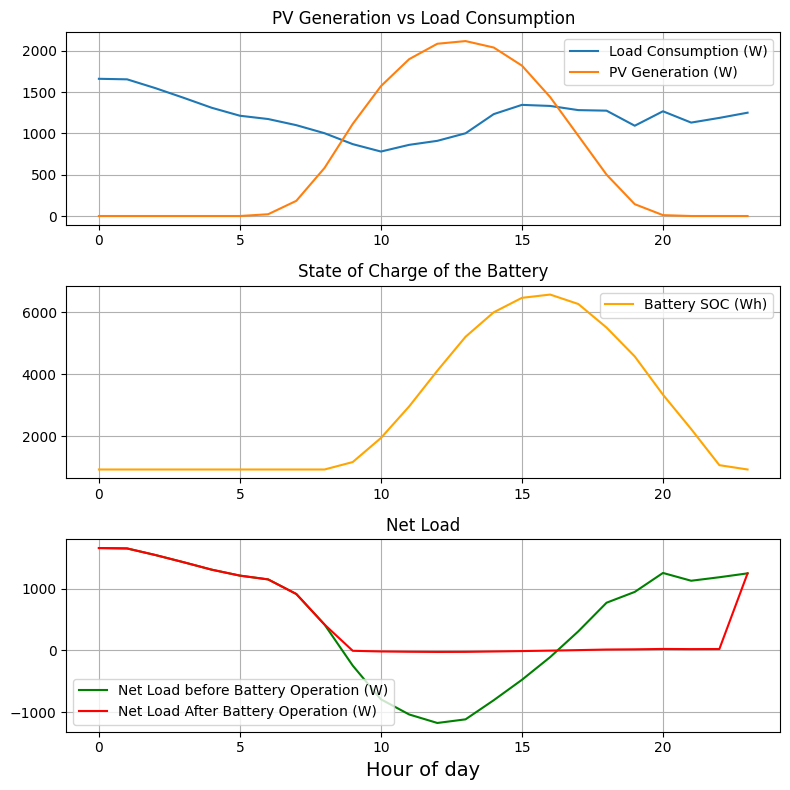

In [70]:
def plot_results( timeframe, pv_data, load_data, netload_no_bat, results ):
    plt.figure(figsize=(8, 8))
    plt.subplot(3, 1, 1)
    plt.plot(timeframe, load_data  ,label='Load Consumption (W)')
    plt.plot(timeframe, pv_data , label='PV Generation (W)')
    plt.legend()
    plt.title('PV Generation vs Load Consumption');     plt.grid()

    plt.subplot(3, 1, 2)
    plt.plot(timeframe, results['SOC'],  color='orange', label='Battery SOC (Wh)')
    plt.legend()
    plt.title('State of Charge of the Battery');     plt.grid()

    plt.subplot(3, 1, 3)
    plt.plot(timeframe, netload_no_bat ,color='green',label='Net Load before Battery Operation (W)')
    plt.plot(timeframe, results['Net Load'] , color='red',  label='Net Load After Battery Operation (W)')
    plt.legend()
    plt.title('Net Load')
    plt.xlabel('Hour of day', fontsize=14)
    plt.grid()

    plt.tight_layout()
    plt.show()

plot_results(timeframe, Production, Consumption, NetLoad, results )


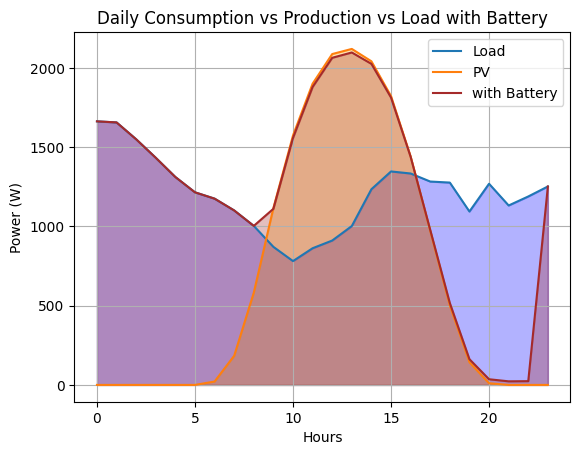

In [71]:
def plot_results2( timeframe, pv_data, load_data, netload_no_bat, results ):

    # update the Consumption with the Shifted load
    Cons_new_df = load_data + results['Charging']- results['Discharging']
    # Reset the index
    #Shifted_load = Shifted_load.reset_index(drop=True)
    #hours = len(pv_data)
    #timeframe = np.linspace(0,hours-1,hours)

    plt.plot(timeframe,load_data, label='Load')
    plt.fill_between(timeframe, load_data, color='blue', alpha=0.3)  # Add shading under the curve

    plt.plot(timeframe,pv_data, label='PV')
    plt.fill_between(timeframe, pv_data, color='orange', alpha=0.3)  # Add shading

    plt.plot(timeframe,Cons_new_df, label='with Battery', color = 'brown')
    plt.fill_between(timeframe, Cons_new_df, color='brown', alpha=0.3)  # Add shading

    #plt.plot(timeframe,  Cons_new_df - pv_data,  marker='o', label='New Net')
    #plt.plot(timeframe,  load_data - pv_data,  marker='o', label='Old Net')

    # Set the labels and title
    plt.xlabel('Hours'); plt.ylabel('Power (W)')
    plt.title('Daily Consumption vs Production vs Load with Battery')
    plt.legend()
    # Set custom x-axis tick labels
    plt.grid();
    # Show the plot
    plt.show();

plot_results2(timeframe, Production, Consumption, NetLoad, results )


Evaluation Metrics

In [72]:
E_used_pv = results['P_PV_used'].sum()
E_total_load = Consumption.sum()
E_total_pv = Production.sum()
SS_no_bat = ( E_used_pv  / E_total_load )*100
SC_no_bat = ( E_used_pv  / E_total_pv ) *100
SC_no_bat

np.float64(65.1297716725854)

In [73]:
# Define evaluation metrics
def system_efficiency(pv_data, load_data, results_bat, results_no_bat):
    # Assume that results_* DataFrame contains columns for 'Net Load', 'PV Used', 'Battery Flow'
    # Battery Flow > 0 when discharging, < 0 when charging

    # Calculate total Energy metrics
    E_total_pv = pv_data.sum()       # total energy by PVs  (Wh)
    E_total_load = load_data.sum()   # total energy by Load (Wh)
    E_total_net = E_total_pv - E_total_load  # total net (Wh)

    #E_bat = 0.5*(abs(results['Net Load'] - NetLoad)).sum()
    #E_bat = max(results_bat['SOC'])         # Assuming max SOC as total energy stored in battery
    E_charging = results_bat['Charging'].sum()
    E_discharging = results_bat['Discharging'].sum()
    E_used_pv = results_bat['P_PV_used'].sum()
    E_wasted_pv = E_total_pv - E_used_pv    # Assuming E_used_pv is energy directly used by the load

    # Efficiency with battery
    # Self Sufficiency with battery
    SS_bat = (( E_used_pv +  E_discharging ) / E_total_load )*100
    # PV Self-Consumption Rate including with battery
    SC_bat = (( E_used_pv + E_charging ) / E_total_pv )*100
    # Load Coverage
    net_load_clipped = results_bat['Net Load'].clip(lower=0).sum()  # Energy not covered by PV and needing grid
    LC_bat = (1 - (net_load_clipped / E_total_load)) * 100

    # Efficiency without battery
    # Self Sufficiency withoutbattery
    SS_no_bat = ( E_used_pv  / E_total_load )*100
    # PV Self-Consumption Rate
    SC_no_bat = ( E_used_pv  / E_total_pv ) *100
    # Load Coverage
    net_no_battery = results_no_bat['NetLoad'].clip(lower=0).sum()  # Energy not covered by PV and needing grid
    LC_no_bat = (1 - (net_no_battery / E_total_load)) * 100

    efficiency_with_battery = {
        'Self Suff Rate%': round(SS_bat,2) ,
        'Self Cons Rate %':  round(SC_bat,2),
       # 'Load Coverage Ratio %': round(LC_bat ,2 )
    }
    efficiency_without_battery = {
        'Self Suff Rate%': round(SS_no_bat,2) ,
        'Self Cons Rate %': round(SC_no_bat,2),
       # 'Load Coverage Ratio %': round(LC_no_bat ,2)
    }

    return efficiency_with_battery, efficiency_without_battery

# Example usage (assuming you have the appropriate DataFrames ready)
eff_with, eff_without = system_efficiency(Production, Consumption, results , hourly_df)

print("Efficiency with Battery:", eff_with)
print("Efficiency without Battery:", eff_without)


Efficiency with Battery: {'Self Suff Rate%': np.float64(56.18), 'Self Cons Rate %': np.float64(99.3)}
Efficiency without Battery: {'Self Suff Rate%': np.float64(37.16), 'Self Cons Rate %': np.float64(65.13)}


Financial Analysis (rough estimation)

In [74]:
# Financial analysis
Total_OptNetEnergy_daily = results['Net Load'].clip(lower=0).sum()
print("Total daily Energy Consumed with Battery:", Total_OptNetEnergy_daily)

Total_NetEnergy_daily = hourly_df['NetLoad'].clip(lower=0).sum()
print("Total daily Energy Consumed without Battery:", Total_NetEnergy_daily)

el_tarriff = 0.1402  #euro / kWh
fuel_tariff = 0.1417
extra_tar = 0.08
total_tar = el_tarriff+fuel_tariff + extra_tar;

# Estimate Yearly costs:
E_Opt_Cost_year = 0.001*Total_OptNetEnergy_daily * (365*24/len(timeframe)) * total_tar
print("Yearly Energy Cost with Battery:", E_Opt_Cost_year)

E_Cost_year = 0.001*Total_NetEnergy_daily  * (365*24/len(timeframe))  * total_tar
print("Yearly Energy Cost without Battery:", E_Cost_year)

Saved = E_Cost_year - E_Opt_Cost_year
print("Yearly Energy Cost Saved:", Saved)


Total daily Energy Consumed with Battery: 12685.81733647937
Total daily Energy Consumed without Battery: 18191.25917471466
Yearly Energy Cost with Battery: 1675.7140123362376
Yearly Energy Cost without Battery: 2402.9470937951714
Yearly Energy Cost Saved: 727.2330814589338


# Optimize (GEKKO: Advanced Process OPTimizer)

**Notes**
- Discharge and charge as two independent variables risks overcomplication, local minimization, extends training time, and could reduce optimization efficacy
- Round trip efficiency is applied twice to the charging and discharging. If these efficiencies are the same, the issue can be simply solved by taking the square root (which I have done below). Alternatively, you could specify different charging and discharging efficiencies and use ternary operators to put them inline. 
- The optimization does not have a self discharge rate. This incentives long term storage in the ESS when it might not be advantageous. This could also create a vanishing gradient in a single-price tariff or energy export minimization. I have not added this in b/c it is near negligible... but something to consider. 
- The current optimization is set for true net-load (i.e reduce the energy consumption). This is a moot operation given that the battery cannot impact net-load... but it can reduce imported energy. I.e., it can increase self consumption and reduce grid strain, but the equation needs to be tweaked as below. 

In [94]:
from gekko import GEKKO

# Create a Gekko model
m = GEKKO(remote=False)  # Use local solving

# Battery specifications
initial_soc = soc_min  # Initial state of charge in Wh
eff = 0.98;  # round trip Efficiency of the battery

# Variables
charge = [m.Var(value=0, lb=0, ub=max_charge_rate, name=f'charge_{i}') for i in range(hours)]
discharge = [m.Var(value=0, lb=0, ub=max_discharge_rate, name=f'discharge_{i}') for i in range(hours)]
soc = [m.Var(value=initial_soc, lb=soc_min, ub=battery_capacity, name=f'soc_{i}') for i in range(hours)]

# Initial state of charge
m.Equation(soc[0] == initial_soc + eff*charge[0] - eff*discharge[0])

# State of charge constraints for subsequent hours
for i in range(1, hours):
    m.Equation(soc[i] == soc[i-1] + eff*charge[i] - eff*discharge[i])

# Complementarity constraint: Charge and discharge cannot be non-zero simultaneously
for i in range(hours):
    m.Equation(charge[i] * discharge[i] == 0)

# Objective function: Minimize the absolute net load
net_load = [Consumption[i] - Production[i] + eff*charge[i] - eff*discharge[i] for i in range(hours)]
#m.Minimize(m.sum([m.abs3(net_load[i]) for i in range(hours)]))  # Using m.abs3 for absolute value
#m.Minimize(m.sum([(net_load[i]**2) for i in range(hours)]))  # this is wrong
m.Minimize(m.sum([tariffs[i]*m.abs3(net_load[i]) for i in range(hours)])) # include variable tariffs.

# Solve the model
# 1 = APOPT (Advanced Process OPTimizer): Good for mixed-integer nonlinear problems.
# 2 = BPOPT: Biegler's IPOPT.
# 3 = IPOPT: Interior Point OPTimizer, good for large-scale nonlinear optimization.
m.options.SOLVER = 1  # APOPT solver for NLP
m.solve(disp=True)

# Print results
print('Charging and Discharging Schedule:')
for i in range(hours):
    print(f'Hour {i+1}: Charge = {round(charge[i].value[0])}, Discharge = {round(discharge[i].value[0])}, SOC = {round(soc[i].value[0])}')


 ----------------------------------------------------------------
 APMonitor, Version 1.0.3
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            1
   Constants    :            0
   Variables    :          193
   Intermediates:            0
   Connections  :           25
   Equations    :          145
   Residuals    :          145
 
 Number of state variables:            193
 Number of total equations: -          145
 Number of slack variables: -           48
 ---------------------------------------
 Degrees of freedom       :              0
 
 ----------------------------------------------
 Steady State Optimization with APOPT Solver
 ----------------------------------------------
Iter:     1 I:  0 Tm:      0.01 NLPi:   13 Dpth:    0 Lvs:    3 Obj:  1.62E+03 Gap:       NaN
--Integer Solution:   1.62E+03 Lowest Leaf:   1.62E+03 Gap:   0.00E+00
Iter

In [90]:
# My attempt at getting rid of two variables that failed: 
'''
from gekko import GEKKO
from math import sqrt

# Create a Gekko model
m = GEKKO(remote=False)  # Use local solving

# Battery specifications
initial_soc = soc_min  # Initial state of charge in Wh
time_step_size = 0.5  # Hours in between each time step
self_discharge = (
    0.00  # Self-discharge rate /h of the battery (change to non-zero to factor in)
)
eff = 0.98 # round trip Efficiency of the battery
sqrt_eff = sqrt(eff)

# Variables; positive charge is charging and negative is discharging
charge = [
    m.Var(value=0, lb=0, ub=max_charge_rate, name=f"charge_{i}") for i in range(hours)
]
soc = [
    m.Var(value=initial_soc, lb=soc_min, ub=battery_capacity, name=f"soc_{i}")
    for i in range(hours)
]

# Initial state of charge
m.Equation(soc[0] == initial_soc + sqrt_eff * charge[0])

# State of charge constraints for subsequent hours
for i in range(1, hours):
    charge_change = m.if3(charge[i] - 0, (sqrt_eff * charge[i]), (charge[i] / sqrt_eff))
    m.Equation(
        soc[i]
        == (soc[i - 1]
        + charge_change
        - time_step_size * self_discharge * soc[i - 1])
    )

# Objective function: Minimize the absolute net load
net_load = [Consumption[i] - Production[i] + charge[i] for i in range(hours)]

# m.Minimize(m.sum([m.abs3(net_load[i]) for i in range(hours)]))  # Using m.abs3 for absolute value
# m.Minimize(m.sum([(net_load[i]**2) for i in range(hours)]))  # this is wrong
m.Minimize(
    m.sum([tariffs[i] * m.abs3(net_load[i]) for i in range(hours)])
)  # include variable tariffs.

# Solve the model
# 1 = APOPT (Advanced Process OPTimizer): Good for mixed-integer nonlinear problems.
# 2 = BPOPT: Biegler's IPOPT.
# 3 = IPOPT: Interior Point OPTimizer, good for large-scale nonlinear optimization.
m.options.SOLVER = 1  # APOPT solver for NLP
m.solve(disp=True)

# Print results
print("Charging and Discharging Schedule:")
for i in range(hours):
    print(
        f"Hour {i+1}: {'Charge' if charge[i].value[0] >= 0 else 'Discharge'}: {round(abs(charge[i].value[0]))}, SOC = {round(soc[i].value[0])}"
    )
'''

In [95]:
# Convert lists to numpy arrays
charge_array = np.array(charge).flatten()
discharge_array = np.array(discharge).flatten()
soc_array = np.array(soc).flatten()

optimized_net_load = Consumption - Production + charge_array - discharge_array
optimized_net_load


0     1696.169523
1     1689.574008
2     1583.194228
3     1466.302932
4     1344.982905
5     1248.443345
6     1187.136872
7     1114.142702
8       -8.592635
9        5.001192
10      16.174959
11      21.189773
12      24.012143
13      22.808123
14      16.470290
15       9.706077
16       2.196306
17      -6.357620
18     -15.826658
19     -19.405420
20     -25.687809
21     -23.105086
22     398.290615
23     684.054126
dtype: float64

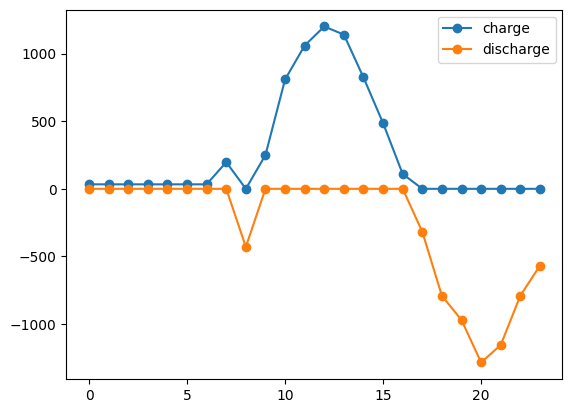

In [96]:
plt.plot(timeframe, charge_array,  marker='o', label='charge')
plt.plot(timeframe, -discharge_array,  marker='o', label='discharge')
#plt.plot(timeframe, charge_array-discharge_array,  marker='o', label='net charge')
plt.legend()
plt.show()

In [97]:
# Calculate SOC over the time period
P_PV_used = []
next_P_PV_used = 0

for i in range(hours):
    #optimized_net_load[i] = Consumption[i] - Production[i] + charge[i] - discharge[i]
    if NetLoad[i] <= 1e-6:
       next_P_PV_used = Consumption[i]
    else:
       next_P_PV_used = Production[i]
    P_PV_used.append(next_P_PV_used)

results3 = pd.DataFrame(index=Production.index)
results3['SOC'] = soc_array
results3['Net Load'] = optimized_net_load
results3['P_PV_used'] = P_PV_used
results3['Charging'] = charge_array
results3['Discharging'] = discharge_array

# Round all numeric columns to two decimal places
results3 = results3.applymap(lambda x: round(x, 3) if isinstance(x, (int, float)) else x)

# Display the DataFrame
print(results3)

         SOC  Net Load  P_PV_used  Charging  Discharging
0    498.027  1696.170      0.000    33.191        0.000
1    530.554  1689.574      0.000    33.191        0.000
2    563.082  1583.194      0.000    33.191        0.000
3    595.610  1466.303      0.000    33.192        0.000
4    628.139  1344.983      0.000    33.192        0.000
5    660.668  1248.443      0.000    33.193        0.000
6    693.198  1187.137     21.427    33.194        0.000
7    886.539  1114.143    184.063   197.287        0.000
8    465.500    -8.593    582.401     0.000      429.632
9    710.558     5.001    871.120   250.060        0.000
10  1503.131    16.175    781.347   808.748        0.000
11  2541.430    21.190    862.459  1059.489        0.000
12  3718.025    24.012    911.062  1200.607        0.000
13  4835.623    22.808   1002.459  1140.406        0.000
14  5642.668    16.470   1234.868   823.514        0.000
15  6118.265     9.706   1346.918   485.304        0.000
16  6225.884     2.196   1334.0

/var/folders/gb/sjxj389901n7jtz0mzqvm0xr0000gn/T/ipykernel_65854/2385411987.py:21: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  results3 = results3.applymap(lambda x: round(x, 3) if isinstance(x, (int, float)) else x)


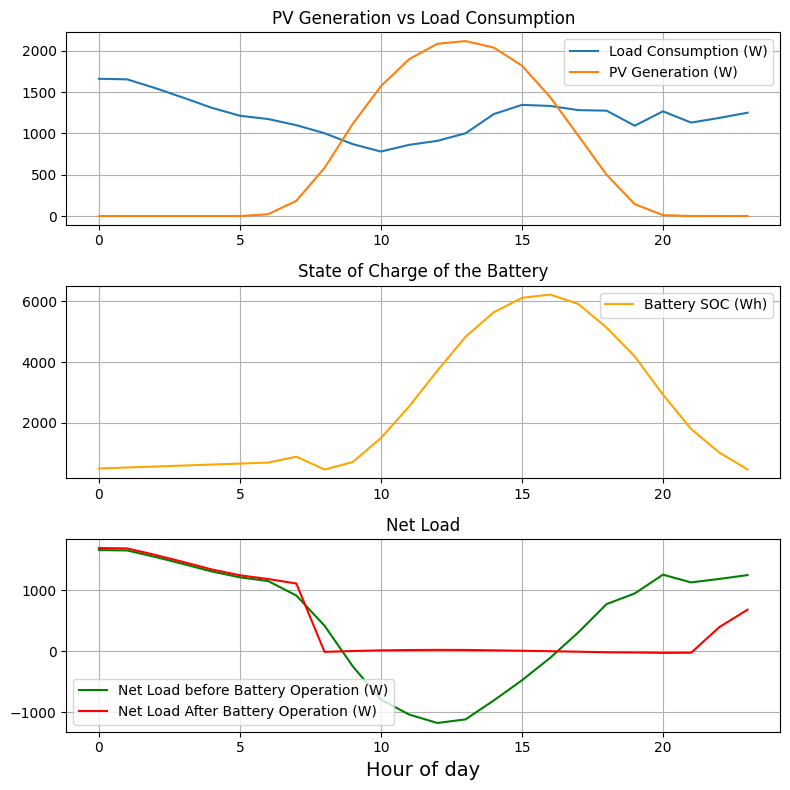

Efficiency with Battery: {'Self Suff Rate%': np.float64(58.95), 'Self Cons Rate %': np.float64(103.31)}
Efficiency without Battery: {'Self Suff Rate%': np.float64(37.16), 'Self Cons Rate %': np.float64(65.13)}


In [98]:
plot_results(np.linspace(0,hours-1,hours), Production, Consumption, NetLoad, results3 )

eff_with, eff_without = system_efficiency(Production, Consumption, results3 , hourly_df)
print("Efficiency with Battery:", eff_with)
print("Efficiency without Battery:", eff_without)

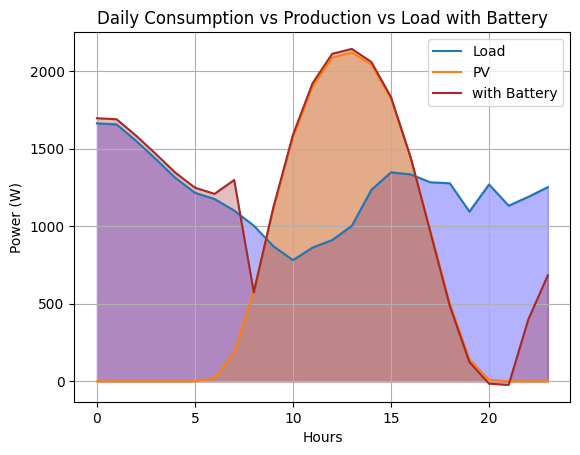

In [99]:
plot_results2(timeframe, Production, Consumption, NetLoad, results3 )


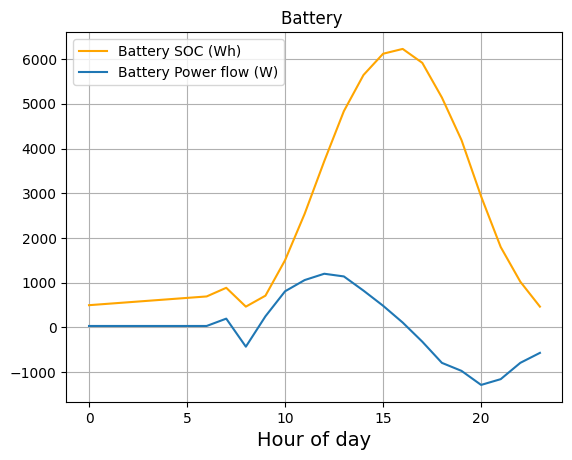

In [100]:
plot_soc1( timeframe, results3 )

# Optimize (Pyomo)


In [ ]:
## solvers
#GLPK solver:
%apt-get install -y -qq glpk-utils
#CPLEX solver
%pip install cplex -q

#IPOPT solver
#!wget -N -q "https://ampl.com/dl/open/ipopt/ipopt-linux64.zip"
#!unzip -o -q ipopt-linux64
#COUENNE solver
%wget -N -q "https://ampl.com/dl/open/couenne/couenne-linux64.zip"
%unzip -o -q couenne-linux64
#BONMIN solver
%wget -N -q "https://ampl.com/dl/open/bonmin/bonmin-linux64.zip"
%unzip -o -q bonmin-linux64



UsageError: Line magic function `%apt-get` not found.


In [ ]:
# IPOPT solver
%wget -N -q "https://matematica.unipv.it/gualandi/solvers/ipopt-linux64.zip"
#!wget -N -q "https://ampl.com/d1/open/ipopt/ipopt-linux64.zip"
%unzip -o -q ipopt-linux64

UsageError: Line magic function `%wget` not found.


In [ ]:
import pyomo.environ as pyo
from pyomo.environ import SolverFactory
from pyomo.environ import *
#!apt-get install -y -qq coinor-libipopt-dev


AttributeError: `np.float_` was removed in the NumPy 2.0 release. Use `np.float64` instead.

In [ ]:
# parameters are defined somewhere in your script
'''
battery_capacity = 0.95*9800  # in Wh
max_charge_rate = 5000  # Max charge rate in W (power)
max_discharge_rate = 0.5*7000  # Max discharge rate in W (power)
soc_min = 0.05*battery_capacity  # Maximum Depth of Discharge 10%
battery_soc = soc_min  # Initial state of charge in Wh
eff = 0.98;  # Charge/discharge Efficiency of the battery
'''

# define model
model = pyo.ConcreteModel()

# Parameters
model.L = pyo.Param(model.i,initialize = {'desk':8, 'table':6, 'chair':1} );

L = model.L
# decision variables
model.charge = Var(range(hours), domain=NonNegativeReals, bounds=(0, max_charge_rate))
charge = model.charge
model.discharge = Var(range(hours), domain=NonNegativeReals, bounds=(0, max_discharge_rate))
discharge = model.discharge
model.soc = Var(range(hours), domain=NonNegativeReals, bounds=(soc_min, battery_capacity))
soc = model.soc

# Initial state of charge
model.initial_soc_constraint = Constraint(expr= soc[0] == soc_min + eff*model.charge[0] - eff*model.discharge[0])

# Objective function: Minimize the absolute net load
def objective_rule(model):
    net_load = [Consumption[i] - Production[i] + eff*model.charge[i] - eff*model.discharge[i] for i in range(hours)]
    return sum(abs(net_load[i]) for i in range(hours))
    #return sum((net_load[i])**2 for i in range(hours))
    return sum(abs(net_load[i]) for i in range(hours)); # add tariffs.
model.objective = Objective(rule=objective_rule, sense=minimize)

# Constraints for subsequent hours
def Cons1(model, i):
    if i > 0:
        return model.soc[i] == model.soc[i-1] + eff*model.charge[i] - eff*model.discharge[i]
    else:
        return soc[0] == soc_min + eff*model.charge[0] - eff*model.discharge[0]
model.Cons1 = Constraint(range(hours), rule=Cons1)

# Complementarity constraint: Charge and discharge cannot be non-zero simultaneously
def complementarity_constraint(model, i):
    return model.charge[i] * model.discharge[i] == 0
model.complementarity_constraint = Constraint(range(hours), rule=complementarity_constraint)

# Solver
#solver = SolverFactory('ipopt', executable='/content/ipopt')
#solver = SolverFactory('ipopt')
#results = solver.solve(model, tee=True)

# Solver: using solver from Neos Server
import os
os.environ['NEOS_EMAIL']='panosherodotou1992@gmail.com'
solver = SolverManagerFactory('neos') #SolverManagerFactory should be imported instead of SolverFactory
#results4 = solver.solve(model,opt='ipopt') # does not work
#results4 = solver.solve(model,opt='minlp')  # works ok
#results4 = solver.solve(model,opt='filter')  # works ok
#results4 = solver.solve(model,opt='filmint')  # works well
results4 = solver.solve(model,opt='lancelot')  #best so far

# Print the results
print(results4)
print('Charging and Discharging Schedule:')
for i in range(hours):
    print(f'Hour {i+1}: Charge = {round(value(model.charge[i]),2)}, Discharge = {round(value(model.discharge[i]),2)}, SOC = {round(value(model.soc[i]),2)}')



KeyboardInterrupt: 

In [ ]:
# Convert pyomo Var to lists
charge = [value(model.charge[i]) for i in range(hours)]
discharge = [value(model.discharge[i]) for i in range(hours)]
soc = [value(model.soc[i]) for i in range(hours)]

# Convert lists to numpy arrays
charge_array = np.array(charge).flatten()
discharge_array = np.array(discharge).flatten()
soc_array = np.array(soc).flatten()

optimized_net_load = Consumption - Production + charge_array - discharge_array
#optimized_net_load

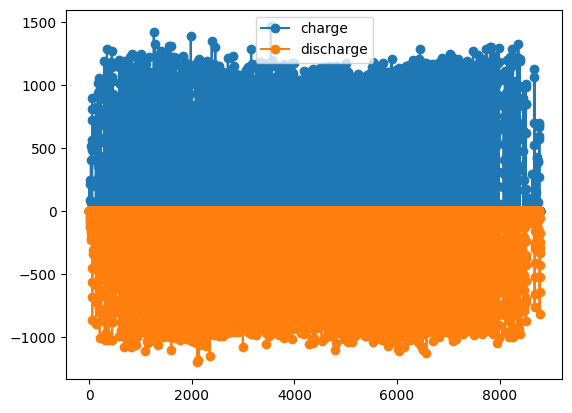

In [ ]:
plt.plot(timeframe, charge_array,  marker='o', label='charge')
plt.plot(timeframe, -discharge_array,  marker='o', label='discharge')
#plt.plot(timeframe, charge_array-discharge_array,  marker='o', label='net charge')
plt.legend()
plt.show()

In [ ]:
# Calculate SOC over the time period
P_PV_used = []
next_P_PV_used = 0

for i in range(hours):
    #optimized_net_load[i] = Consumption[i] - Production[i] + charge[i] - discharge[i]
    if NetLoad[i] <= 1e-6:
       next_P_PV_used = Consumption[i]
    else:
       next_P_PV_used = Production[i]
    P_PV_used.append(next_P_PV_used)

results4 = pd.DataFrame(index=Production.index)
results4['SOC'] = soc_array
results4['Net Load'] = optimized_net_load
results4['P_PV_used'] = P_PV_used
results4['Charging'] = charge_array
results4['Discharging'] = discharge_array

# Round all numeric columns to two decimal places
results4 = results4.applymap(lambda x: round(x, 2) if isinstance(x, (int, float)) else x)

# Display the DataFrame
print(results4)

          SOC  Net Load  P_PV_used  Charging  Discharging
0      465.50    963.49        0.0       0.0         0.05
1      465.50    925.43        0.0       0.0         0.10
2      465.50    839.56        0.0       0.0         0.10
3      465.50    693.66        0.0       0.0         0.10
4      465.50    548.36        0.0       0.0         0.10
...       ...       ...        ...       ...          ...
8779  1299.36   1456.74        0.0       0.0       422.80
8780   974.99   1351.87        0.0       0.0       331.09
8781   686.71   1185.84        0.0       0.0       294.26
8782   519.56   1020.65        0.0       0.0       170.67
8783   465.50    922.90        0.0       0.0        55.27

[8784 rows x 5 columns]


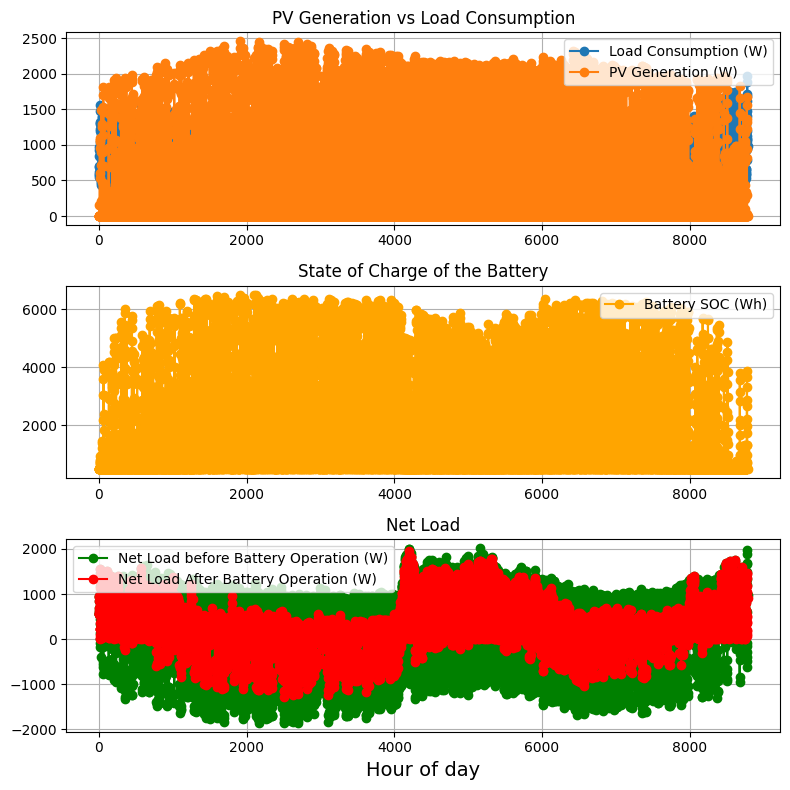

Efficiency with Battery: {'Self Suff Rate%': 61.97, 'Self Cons Rate %': 90.93}
Efficiency without Battery: {'Self Suff Rate%': 37.5, 'Self Cons Rate %': 55.04}


In [ ]:
plot_results(np.linspace(0,hours-1,hours), Production, Consumption, NetLoad, results4 )

eff_with, eff_without = system_efficiency(Production, Consumption, results4 , hourly_df)
print("Efficiency with Battery:", eff_with)
print("Efficiency without Battery:", eff_without)

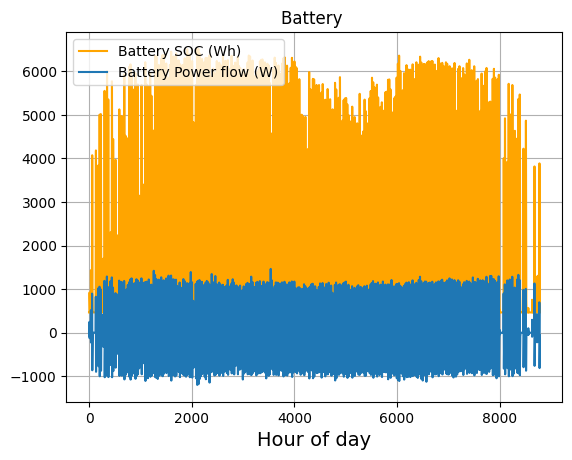

In [ ]:
plot_soc1( timeframe, results4 )

# Optimized model (SciPy: SLSQP)
Objective:
**Minimize abs(NetLoad)**
= minimize peak consumption & maximise using PV generation

In [ ]:
from scipy.optimize import minimize


In [ ]:
# Battery specifications
initial_soc = soc_min  # Initial state of charge in Wh
battery_capacity = 0.9*4600  # in Wh

# Decision variables initialization: positive for discharge, negative for charge
initial_actions = np.zeros(2 * hours)  # x0: Initial guess for both charge and discgharge

# Define bounds
bounds = [(0, max_charge_rate) for _ in range(hours)] + [(0, max_discharge_rate) for _ in range(hours)]

# Inequality Constraints:
def constraints_ineq(actions):  # i metavlites einai to charge/discharge
    charge, discharge = actions[:hours], actions[hours:]  # Split actions into charge and discharge
    soc = initial_soc  # Start with the initial SOC
    cons = []

    for i in range(hours):
        soc += charge[i] - discharge[i]

        cons.append(battery_capacity - soc)  # SOC must not exceed capacity
        cons.append(soc - soc_min)  # SOC must not be negative
        cons.append(max_charge_rate - charge[i])  # Charge rate limit
        cons.append(max_discharge_rate - discharge[i])  # Discharge rate limit
        cons.append(charge[i])
        cons.append(discharge[i])
        #cons.append(charge[i] * discharge[i] )  # Charge and discharge cannot be non-zero simultaneously
        cons.append(charge[i] * discharge[i] ==0)  # Charge and discharge cannot be non-zero simultaneously

        #soc += charge[i] - discharge[i]
        net_load = Consumption[i] - Production[i] - discharge[i] + charge[i]
    return cons

def constraints_eq(actions):
    charge, discharge = actions[:hours], actions[hours:]  # Split actions into charge and discharge
    cons = []
    # Complementarity constraints (charge[i] * discharge[i] == 0)
    for i in range(hours):
        cons.append(charge[i] * discharge[i])
    return cons

# Constraint bounds (all constraints must be >= 0)
cons = [{'type': 'ineq', 'fun': constraints_ineq}]

#cons = [{'type': 'ineq', 'fun': constraints_ineq} ,
#        {'type': 'eq', 'fun': constraints_eq}]

# Objective function to minimize the absolute net load
def objective(actions):
    charge, discharge = actions[:hours], actions[hours:]  # Split actions into charge and discharge
    net_load = Consumption - Production + charge - discharge
    return np.sum(np.abs(net_load))  # Sum of absolute values of net loads
    #return np.sum(net_load**2)        # Sum of squared values of net loads


In [ ]:
# Optimization
options = {'maxiter': 500, 'ftol': 1e-5, 'disp': True}

#result = minimize(objective, initial_actions, method='nelder-mead', constraints=cons , options=options)
#result = minimize(objective,  initial_actions, method='SLSQP', constraints=cons , options=options)
result = minimize(objective,  initial_actions, method='BFGS', constraints=cons , options=options)
#result = minimize(objective,  initial_actions, method='CG', constraints=cons , options=options)

if result.success:
    optimized_battery_actions = result.x
    charge_opt = optimized_battery_actions[0:hours]
    discharge_opt = optimized_battery_actions[hours:2 * hours]
    optimized_net_load = Consumption - Production + charge_opt - discharge_opt
    print("Optimized Battery Actions:", optimized_battery_actions)
    print("Optimized Net Load:", optimized_net_load)
else:
    print("Optimization failed:", result.message)

plt.plot(timeframe, charge_opt,  marker='o', label='charge')
plt.plot(timeframe, -discharge_opt,  marker='o', label='discharge')
#plt.plot(ntimeframe, charge_opt-discharge_opt,  marker='o', label='net charge')
plt.legend(); plt.show()

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:576: RuntimeWarning: Method BFGS cannot handle constraints.
  warn('Method %s cannot handle constraints.' % method,
<ipython-input-45-168a6cda4358>:6: OptimizeWarning: Unknown solver options: ftol
  result = minimize(objective,  initial_actions, method='BFGS', constraints=cons , options=options)


         Current function value: 0.000039
         Iterations: 161
         Function evaluations: 14657
         Gradient evaluations: 299
Optimization failed: Desired error not necessarily achieved due to precision loss.


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


NameError: name 'charge_opt' is not defined

In [ ]:
# Calculate SOC over the time period
P_PV_used = []
next_P_PV_used = 0
soc = [initial_soc]  # Start with the initial SOC

for i in range(hours):
    next_soc = soc[-1] + charge_opt[i] - discharge_opt[i]   # Update SOC: subtract if discharging (result.x is negative for charging)
    soc.append(next_soc)
    if NetLoad[i] < -1e-6:
       next_P_PV_used = Consumption[i]
    else:
       next_P_PV_used = Production[i]
    P_PV_used.append(next_P_PV_used)  # adding the load to previous

# Initialize DataFrame for results
results2 = pd.DataFrame(index=Production.index)

results2['SOC'] = soc[0:len(timeframe)]
results2['Net Load'] = optimized_net_load
results2['P_PV_used'] = P_PV_used
results2['Charging'] = charge_opt
results2['Discharging'] = discharge_opt

# Round all numeric columns to two decimal places
results2 = results2.applymap(lambda x: round(x, 3) if isinstance(x, (int, float)) else x)

# Display the DataFrame
print(results2)


         SOC  Net Load  P_PV_used  Charging  Discharging
0    414.000   500.448      0.000     0.000        0.000
1    414.000   555.437      0.000     0.000        0.000
2    414.000   531.301      0.000     0.000        0.000
3    414.000   414.829      0.000     0.000        0.000
4    414.000   391.828      0.000     0.000        0.000
5    414.000   357.852      0.000     0.000        0.000
6    414.000   305.892      9.886     0.000        0.000
7    414.000   171.170    195.726     0.000        0.000
8    414.000  -173.778    442.736   339.403      201.286
9    552.116  -585.806    505.640   468.880       70.226
10   950.770  -689.869    705.713   468.880       70.226
11  1349.424  -761.091    863.450   468.880       70.226
12  1748.077  -811.389    907.548   468.880       70.226
13  2146.731  -838.585    835.204   468.880       70.226
14  2545.385  -907.330    521.181   468.880       70.226
15  2944.039  -830.775    494.088   468.880       70.226
16  3342.692  -675.714    578.7

In [ ]:
P_PV_used

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 9.885661764705882,
 195.72580542986427,
 442.7364731934732,
 505.64045454545453,
 705.7131684491978,
 863.4502205882353,
 907.5480147058823,
 835.2041911764707,
 521.1811764705883,
 494.08786764705883,
 578.7213970588235,
 524.9158088235295,
 412.01029411764705,
 75.85764705882353,
 1.9741911764705886,
 0.0,
 0.0,
 0.0]

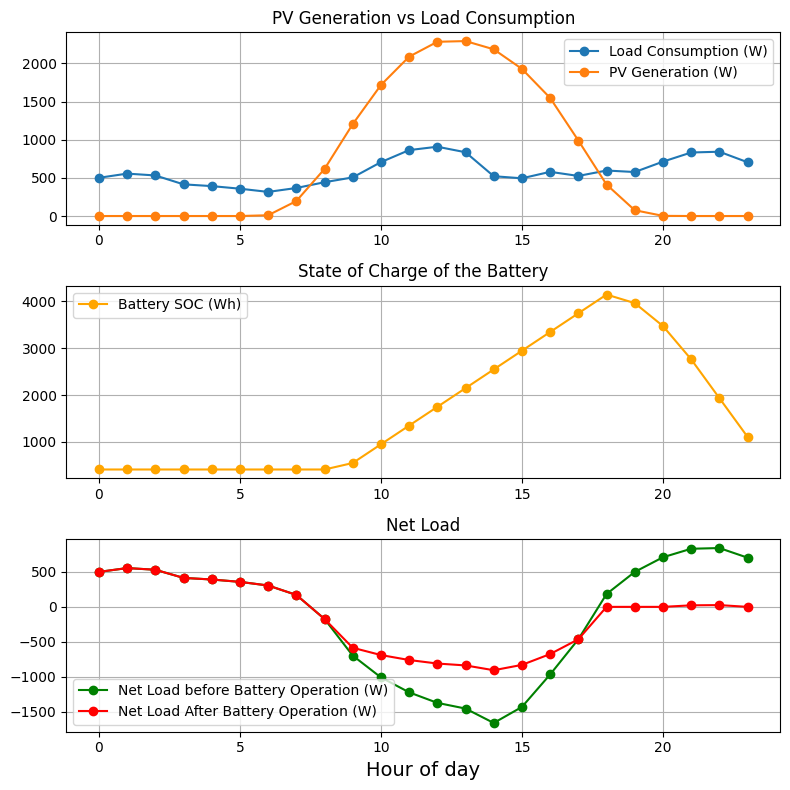

Efficiency with Battery: {'Self Sufficiency Rate%': 85.14, 'Self Consumption Rate %': 68.33, 'Load Coverage Ratio %': 76.73}
Efficiency without Battery: {'Self Sufficiency Rate%': 50.26, 'Self Consumption Rate %': 40.34, 'Load Coverage Ratio %': 50.26}


In [ ]:
# Plot results
plot_results(np.linspace(0,hours-1,hours), Production, Consumption, NetLoad, results2 )

# Example usage (assuming you have the appropriate DataFrames ready)
eff_with, eff_without = system_efficiency(Production, Consumption, results2 , hourly_df)

print("Efficiency with Battery:", eff_with)
print("Efficiency without Battery:", eff_without)

In [ ]:
plot_results2(timeframe, Production, Consumption, NetLoad, results2 )


# DEAP library: Genetic ALgorithm

In [ ]:
!pip install deap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 2.7 MB/s eta 0:00:00


In [ ]:
import random
from deap import base, creator, tools, algorithms
import numpy as np

# Problem data

# Fitness function to minimize absolute net load
def evalNetLoad(individual):
    soc = initial_soc
    net_load_sum = 0  # Initialize sum of net loads for fitness evaluation
    penalty = 0  # Initialize penalty

    for i in range(hours):
        charge, discharge = individual[2*i], individual[2*i+1]

        # Calculate the net load for this hour considering the charge/discharge
        net_load = Production[i] - Consumption[i] + charge - discharge

        # Update the state of charge of the battery
        soc += charge - discharge

        # Constraints
        if soc < soc_min or soc > battery_capacity:
            penalty += 1e6  # SOC must remain within bounds
        if charge > max_charge_rate or charge <0:
            penalty += 1e6  # Charge rate must not exceed maximum
        if discharge > max_discharge_rate or discharge<0:
            penalty += 1e6  # Discharge rate must not exceed maximum
        #if discharge * charge < 0:
        #    penalty += 1e6  # contentiality

     # Objective is to minimize the absolute value of net load
        net_load_sum += abs(net_load)

    # The fitness value combines the net load balance goal and penalties for constraint violations
    return net_load_sum + penalty,

# Set up DEAP framework for minimization
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("attr_float", random.uniform, -max_discharge_rate, max_charge_rate)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, 2*hours)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", evalNetLoad)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutUniformInt, low=-max_discharge_rate, up=max_charge_rate, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=5)

# Genetic Algorithm parameters
population = toolbox.population(n=100)
NGEN = 100
CXPB, MUTPB = 0.5, 0.2

# Run the Genetic Algorithm
for gen in range(NGEN):
    offspring = algorithms.varAnd(population, toolbox, cxpb=CXPB, mutpb=MUTPB)
    fits = toolbox.map(toolbox.evaluate, offspring)
    for fit, ind in zip(fits, offspring):
        ind.fitness.values = fit
    population = toolbox.select(offspring, k=len(population))

top10 = tools.selBest(population, k=10)
print("Top 10 solutions:")
for ind in top10:
   print(ind, ind.fitness.values)


Top 10 solutions:
[100.1642323096521, -626.8977549422525, 392.79543398181977, 861.1975943551761, 1464.2618494555063, -844.1418091568758, -2410, 94.69592050116171, 1954.2845709610938, 852, -2193.8183128442824, -2474.8881035875934, 2608, 907.8447971365395, 933.9697701215737, 924.0744294224069, 1759, -1776.1506166558215, -3306.691452734692, 1327.641364478939, 600.8376766878646, 410.0508248882952, -494, 884, 976, -1182, 18.01926379068209, 497, -700.0598452088802, 275.3870296502664, 149, 325.06889082236194, 845, -1353.5549472861844, 1629.26038549232, 2567.222934892413, 1648.3143993802905, 1560.9386355660436, 780, 123, 372.7364447571408, 1398.8771326393116, 861, 183.3449475483867, 1683.299255433285, 2651.2496224494153, 2320.043766682198, 2305.513887362854] (12031681.873550396,)
[100.1642323096521, -626.8977549422525, 392.79543398181977, 861.1975943551761, 1464.2618494555063, -844.1418091568758, -2410, 94.69592050116171, 1954.2845709610938, 852, -2193.8183128442824, -2474.8881035875934, 2608,

In [ ]:
def calculate_soc(individual):
    soc_values = [initial_soc]  # Start with the initial state of charge
    charge_sequence = []
    discharge_sequence = []

    for i in range(hours):
        charge = individual[2 * i]     # Even index: charge
        discharge = individual[2 * i + 1]  # Odd index: discharge
        charge_sequence.append(charge)
        discharge_sequence.append(discharge)

        new_soc = soc_values[-1] + charge - discharge
        # Enforce SOC boundaries considering battery constraints
        new_soc = max(0, min(new_soc, battery_capacity))
        soc_values.append(new_soc)

    return soc_values, charge_sequence, discharge_sequence

# Example: Processing each top individual
for index, ind in enumerate(top10):
    soc_trajectory = calculate_soc(ind)
    #print(f"Top solution {index + 1}:")
    #print("Charge sequence:", [ind[2 * i] for i in range(hours)])
    #print("Discharge sequence:", [ind[2 * i + 1] for i in range(hours)])
    #print("SOC trajectory:", soc_trajectory)
    #print("Final SOC:", soc_trajectory[-1], "\n")



State of Charge (SOC) Values: [414.0, 1141.0619872519046, 672.6598268785483, 2981.0634854909304, 476.36756498976865, 1578.6521359508624, 1859.7219266941734, 3559.8771295576344, 3569.772470256801, 4140.0, 0, 190.78685179956938, 0, 2158, 1679.019263790682, 703.5723889315354, 527.5034981091735, 2726.058445395358, 1788.095895995265, 1875.471659809512, 2532.471659809512, 1506.3309719273411, 2183.9860243789544, 1216.0356573628242, 1230.5655366821684]
Charge Sequence: [100.1642323096521, 392.79543398181977, 1464.2618494555063, -2410, 1954.2845709610938, -2193.8183128442824, 2608, 933.9697701215737, 1759, -3306.691452734692, 600.8376766878646, -494, 976, 18.01926379068209, -700.0598452088802, 149, 845, 1629.26038549232, 1648.3143993802905, 780, 372.7364447571408, 861, 1683.299255433285, 2320.043766682198]
Discharge Sequence: [-626.8977549422525, 861.1975943551761, -844.1418091568758, 94.69592050116171, 852, -2474.8881035875934, 907.8447971365395, 924.0744294224069, -1776.1506166558215, 1327.64

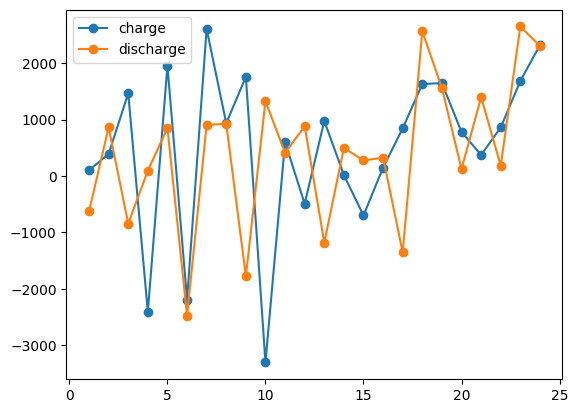

In [ ]:
# Assuming 'top10' contains your top 10 GA solutions
individual = top10[9]  # Get the first individual from the top 10 list

# Call the calculate_soc function with an actual individual
soc_values, charge_sequence, discharge_sequence = calculate_soc(individual)

# Output the results
print("State of Charge (SOC) Values:", soc_values)
print("Charge Sequence:", charge_sequence)
print("Discharge Sequence:", discharge_sequence)

plt.plot(timeframe, charge_sequence,  marker='o', label='charge')
plt.plot(timeframe, discharge_sequence,  marker='o', label='discharge')
#plt.plot(timeframe, charge_sequence-discharge_sequence,  marker='o', label='net charge')
plt.legend()
plt.show()

In [ ]:

optimized_net_load = Consumption - Production + charge_sequence - discharge_sequence
#optimized_net_load

# Calculate SOC over the time period
E_pv_used = []
next_E_pv_used = 0

for i in range(hours):
    #optimized_net_load[i] = Consumption[i] - Production[i] + charge[i] - discharge[i]
    if optimized_net_load[i]<0:
       next_E_pv_used = Consumption[i]
    else:
       next_E_pv_used =0
    E_pv_used.append(next_E_pv_used)

results4 = pd.DataFrame(index=Production.index)
results4['SOC'] = soc_values[1:]
results4['Net Load'] = optimized_net_load
results4['E_PV_used'] = E_pv_used

# Round all numeric columns to two decimal places
results4 = results4.applymap(lambda x: round(x, 3) if isinstance(x, (int, float)) else x)

# Display the DataFrame
print(results4)

                  SOC  Net Load  E_PV_used
hour_of_day                               
0            1141.062  1540.498      0.000
1             672.660   270.253      0.000
2            2981.063  2985.725      0.000
3             476.368 -1883.880    620.816
4            1578.652  1680.487      0.000
5            1859.722   862.774      0.000
6            3559.877  2335.712      0.000
7            3569.772   620.353      0.000
8            4140.000  3738.426      0.000
9               0.000 -4971.440    700.283
10            190.787  -566.106    719.446
11              0.000 -2395.493    750.208
12           2158.000  1076.944      0.000
13           1679.019 -1478.136    866.325
14            703.572 -1781.499    868.775
15            527.503  -621.546    909.996
16           2726.058  2165.491      0.000
17           1788.096  -553.427    910.465
18           1875.472   844.709      0.000
19           2532.472  1638.378      0.000
20           1506.331    83.465      0.000
21         

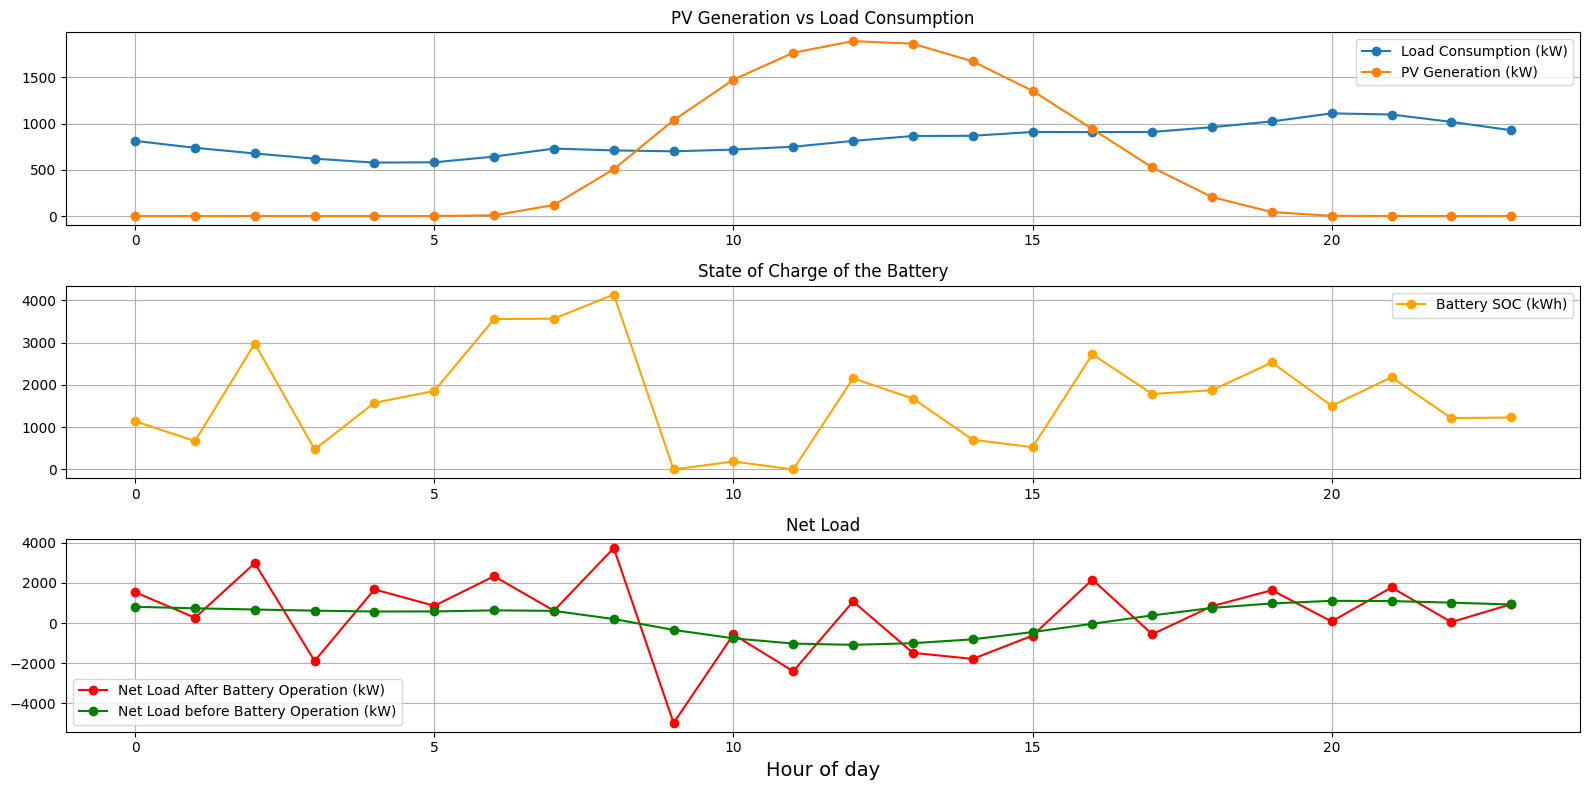

KeyError: 'Charging'

In [ ]:
plot_results(np.linspace(0,hours-1,hours), Production, Consumption, NetLoad, results4 )

eff_with, eff_without = system_efficiency(Production, Consumption, results4 ,hourly_df)
print("Efficiency with Battery:", eff_with)
print("Efficiency without Battery:", eff_without)

# Pygmo: SADE

In [ ]:
!pip install pygmo


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 10.2 MB/s eta 0:00:00


In [ ]:
import pygmo as pg
import numpy as np
#print(pg.algorithm_list())


In [ ]:

class BatteryOptimization:
    def __init__(self, production, consumption, hours=24, battery_capacity=4600,
                 max_charge_rate=2800, max_discharge_rate=4000, initial_soc=0):
        self.production = np.array(production)
        self.consumption = np.array(consumption)
        self.hours = hours
        self.battery_capacity = battery_capacity
        self.max_charge_rate = max_charge_rate
        self.max_discharge_rate = max_discharge_rate
        self.initial_soc = initial_soc

    def fitness(self, x):
        charge = x[:self.hours]
        discharge = x[self.hours:2*self.hours]
        soc = self.initial_soc
        total_penalty = 0
        net_load_sum = 0
        constraints = []

        for i in range(self.hours):
            #charge = x[2*i] if x[2*i] <= self.max_charge_rate else self.max_charge_rate
            #discharge = x[2*i+1] if x[2*i+1] <= self.max_discharge_rate else self.max_discharge_rate
            soc += charge[i] - discharge[i]

            net_load = self.consumption[i] - self.production[i] + charge[i] - discharge[i]
            net_load_sum += abs(net_load)
            #net_load_sum += net_load**2  # Using square to avoid absolute value

            # Adding constraint violations directly into the fitness vector
            constraints.append( -soc + self.battery_capacity)  # SOC should not exceed capacity
            #constraints.append( soc)  # SOC should not be below 0
            constraints.append( -charge[i] + self.max_charge_rate)  # Charge rate check
            constraints.append( -discharge[i] + self.max_discharge_rate)  # Discharge rate check

        # Combine objective and constraints in one list
        return [net_load_sum] + constraints

    def get_bounds(self):
        lb = [0] * 3 * self.hours
        ub = [self.battery_capacity] * self.hours + [self.max_charge_rate] * self.hours + [self.max_discharge_rate]* self.hours
        return (lb, ub)
        #return (None,None)  # No bounds on the variables

    def gradient(self, x):
        # Using PyGMO's built-in finite difference to estimate gradients
        return pg.estimate_gradient_h(lambda x: self.fitness(x), x)

    def get_nobj(self):
        return 1

    def get_nic(self):
        return 3 * self.hours  # Four constraints per hour

    def get_nec(self):
        return 0

    def get_name(self):
        return "Battery Optimization Problem"

    def get_extra_info(self):
        return "\tBattery capacity: {} Wh\n".format(self.battery_capacity)




In [ ]:
# Create the problem
prob = pg.problem(BatteryOptimization(Production, Consumption))

# Create the algorithm
#algo = pg.algorithm(pg.sade(gen=500))  # Using Self-adaptive Differential Evolution algorithm (SADE) for demonstration
algo = pg.algorithm(pg.ipopt())
# = pg.algorithm(pg.slsqp(max_iter=100, acc=1e-6))

# Create population
pop = pg.population(prob, size=50)  # Population of 10 individuals

# Run the optimization
pop = algo.evolve(pop)

# Extract and print the best result
champion_x = pop.champion_x
champion_f = pop.champion_f
print("Best solution:", champion_x)
print("Best fitness:", champion_f)

Best solution: [4600.000046   4367.552007   4345.3589228  3821.04478429 3805.77644313
 3824.53215107 3881.42855155 3744.56548896 4120.60144751 4109.99618315
 4105.43025532 4173.74225743 4018.33152693 3546.36420875 3553.7807661
 3604.31542217 3576.33741845 3509.27305195 3514.1534858  3532.3895606
 3747.08559982 3465.06920665 3536.65508503 3448.7343945   627.85905805
 2800.000028   2800.000028   2800.000028   2800.000028   2800.000028
 2800.000028   2800.000028   2800.000028   2800.000028   2800.000028
 2800.000028   2800.000028   2800.000028   2800.000028   2800.000028
 2800.000028   2800.000028   2800.000028   2800.000028   2800.000028
 2800.000028   2800.000028   2800.000028    988.20882269 2147.95646249
 3320.63182161 1653.26471629  851.77385012 2753.9513063  1911.62936081
  867.93351514 3273.94279491 2617.18235607  730.81413972 2719.28547136
 3315.93685283 1438.15749087  756.57150817  797.75292119 1044.51018724
 2378.12295107   51.75827114 1253.30668214 1047.37564913 2413.49622528
 

In [ ]:
# Example solution array (abbreviated for simplicity)
solution = champion_x  # This would be the array from your genetic algorithm

# Assuming the battery settings from earlier examples

# Initialize lists to hold charge, discharge, and SOC values
charge = []
discharge = []
soc = [initial_soc]  # Start SOC with the initial value

# Extract charge and discharge values and compute SOC
for i in range(hours):
    charge.append(solution[2 * i])  # Even index: charge
    discharge.append(solution[2 * i + 1])  # Odd index: discharge

    # Update SOC, ensure it doesn't exceed capacity or go negative
    new_soc = soc[-1] + charge[-1] - discharge[-1]
    new_soc = max(0, min(new_soc, battery_capacity))  # Bound SOC within [0, battery_capacity]
    soc.append(new_soc)

optimized_net_load = Consumption - Production + charge - discharge

# Print results
print("Charge per hour:", charge)
print("Discharge per hour:", discharge)
print("SOC trajectory:", soc)



Charge per hour: [4600.000045999999, 4345.358922797611, 3805.776443129974, 3881.428551554992, 4120.601447509037, 4105.430255324859, 4018.331526930573, 3553.78076610398, 3576.3374184461227, 3514.153485803344, 3747.085599817859, 3536.655085028862, 627.8590580459527, 2800.000027999999, 2800.000027999999, 2800.000027999999, 2800.000027999999, 2800.000027999999, 2800.000027999999, 2800.000027999999, 2800.000027999999, 2800.000027999999, 2800.000027999999, 2800.000027999999]
Discharge per hour: [4367.552007004267, 3821.0447842867547, 3824.532151073119, 3744.565488958677, 4109.9961831547225, 4173.742257431962, 3546.3642087510248, 3604.315422172447, 3509.273051951984, 3532.389560598506, 3465.0692066473753, 3448.734394497907, 2800.000027999999, 2800.000027999999, 2800.000027999999, 2800.000027999999, 2800.000027999999, 2800.000027999999, 2800.000027999999, 2800.000027999999, 2800.000027999999, 2800.000027999999, 2800.000027999999, 2800.000027999999]
SOC trajectory: [0, 232.44803899573253, 756.7

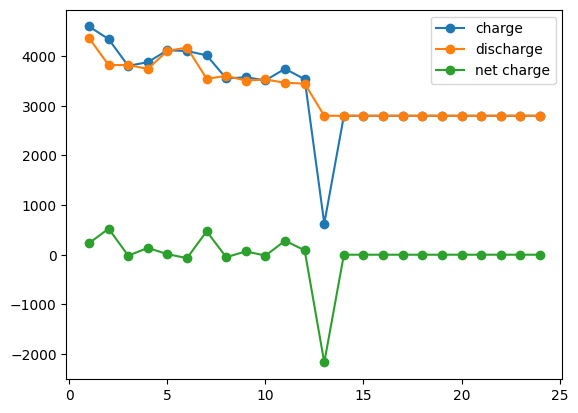

In [ ]:
# Convert lists to numpy arrays
charge_array = np.array(charge).flatten()
discharge_array = np.array(discharge).flatten()
soc_array = np.array(soc).flatten()

optimized_net_load = Consumption - Production + charge_array - discharge_array
optimized_net_load

plt.plot(np.linspace(1,24,24), charge_array,  marker='o', label='charge')
plt.plot(np.linspace(1,24,24), discharge_array,  marker='o', label='discharge')
plt.plot(np.linspace(1,24,24), charge_array-discharge_array,  marker='o', label='net charge')
plt.legend()
plt.show()

In [ ]:
optimized_net_load = Consumption - Production + charge_sequence - discharge_sequence
# Calculate SOC over the time period
E_pv_used = []
next_E_pv_used = 0

for i in range(hours):
    #optimized_net_load[i] = Consumption[i] - Production[i] + charge[i] - discharge[i]
    if optimized_net_load[i]<0:
       next_E_pv_used = Consumption[i]
    else:
       next_E_pv_used =0
    E_pv_used.append(next_E_pv_used)

results5 = pd.DataFrame(index=Production.index)
results5['SOC'] = soc[1:]
results5['Net Load'] = optimized_net_load
results5['E_PV_used'] = E_pv_used

# Round all numeric columns to two decimal places
results5 = results5.applymap(lambda x: round(x, 3) if isinstance(x, (int, float)) else x)

# Display the DataFrame
print(results5)

                  SOC  Net Load  E_PV_used
hour_of_day                               
0               0.000  -176.564    813.436
1               0.000   706.258      0.000
2               0.000  1585.185      0.000
3               0.000   107.132      0.000
4               0.000  -383.428    578.203
5               0.000  -107.035    581.705
6             556.075  1735.557      0.000
7            1213.630  1205.058      0.000
8             720.017  1038.903      0.000
9             325.280  -150.700    700.283
10              0.000    -8.708    719.446
11              0.000  -745.992    750.208
12              0.000   -93.012    813.203
13            611.866  -490.768    866.325
14            746.092   -26.265    868.775
15              0.000 -1213.477    909.996
16              0.000   117.936      0.000
17              0.000  1755.268      0.000
18           1731.724  1114.333      0.000
19           1573.813   654.729      0.000
20            838.940  1406.605      0.000
21         

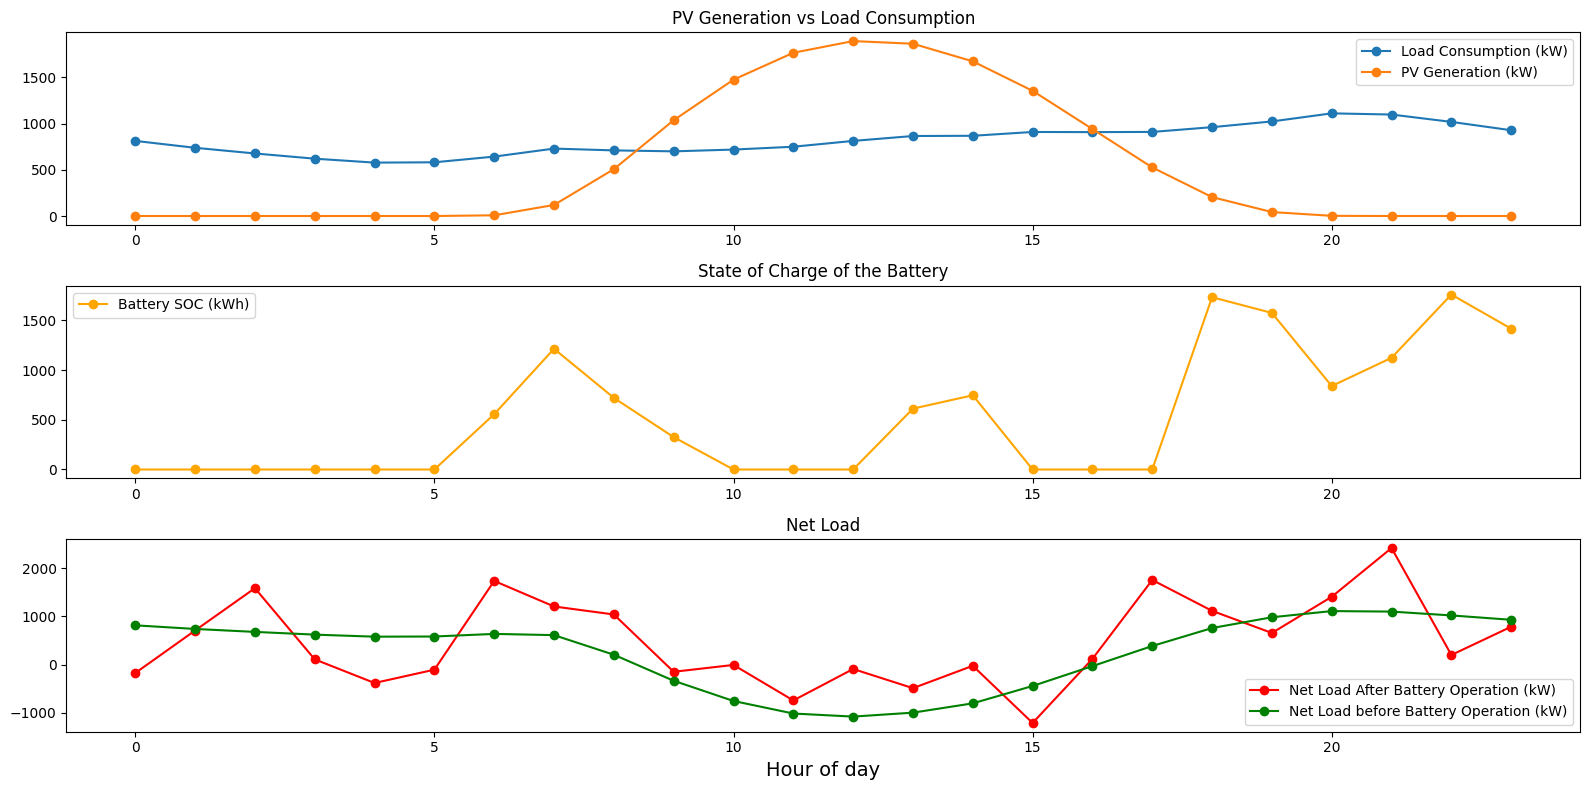

Efficiency with Battery: {'Self Sufficiency %': 47.55, 'PV Energy Usage Efficiency %': 69.73, 'Load Coverage Ratio %': 24.68}
Efficiency without Battery: {'Self Sufficiency %': 38.61, 'PV Energy Usage Efficiency %': 56.63, 'Load Coverage Ratio %': 40.37}


In [ ]:
plot_results(timeframe, Production, Consumption, NetLoad, results5 )
eff_with, eff_without = system_efficiency(Production, Consumption, results5 ,hourly_df)
print("Efficiency with Battery:", eff_with)
print("Efficiency without Battery:", eff_without)

# Optuna Genetic Algo

In [ ]:
!pip install optuna


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 8.1 MB/s eta 0:00:00


In [ ]:
import optuna

def objective(trial):
    # Define the decision variables
    charge_rates = [trial.suggest_float(f"charge_{i}", 0, max_charge_rate) for i in range(hours)]
    discharge_rates = [trial.suggest_float(f"discharge_{i}", 0, max_discharge_rate) for i in range(hours)]

    soc = initial_soc
    net_load_sum = 0
    penalty = 0

    for i in range(hours):
        charge = charge_rates[i]
        discharge = discharge_rates[i]
        net_load = Consumption[i] - Production[i]

        # Implementing the logic for SOC updates and penalties
        if net_load < 0:
            soc += charge
        if net_load > 0:
            soc -= discharge

        if charge > max_charge_rate or discharge > max_discharge_rate:
            penalty += 1/1e6
        if soc < soc_min or soc > battery_capacity:
            penalty += 1/1e6

        net_load_sum += abs(net_load + charge - discharge)

    return net_load_sum + penalty

def run_optimization():
    study = optuna.create_study(direction='minimize')
    study.optimize(objective, n_trials=10)

    print("Best trial:")
    trial = study.best_trial
    print(" Value: ", trial.value)
    print(" Params: ")
    for key, value in trial.params.items():
        print(f"    {key}: {value}")

run_optimization()


[I 2024-06-21 12:00:14,188] A new study created in memory with name: no-name-8326292b-c324-4090-8ec1-7b1c9a42d237
[I 2024-06-21 12:00:14,220] Trial 0 finished with value: 31074.022911392094 and parameters: {'charge_0': 1792.4369034586157, 'charge_1': 2556.5448366799355, 'charge_2': 992.9751606882592, 'charge_3': 1429.6875531518724, 'charge_4': 2217.811423535985, 'charge_5': 1478.5454998354678, 'charge_6': 2109.4737802543395, 'charge_7': 1068.5352180309244, 'charge_8': 1397.471699630949, 'charge_9': 1082.6176343924096, 'charge_10': 1984.876823721158, 'charge_11': 2129.7138544668114, 'charge_12': 203.6898220183085, 'charge_13': 2375.3703007220142, 'charge_14': 610.7080829735255, 'charge_15': 1998.34448964221, 'charge_16': 1149.6317453965216, 'charge_17': 575.2952391555762, 'charge_18': 1392.4789122444386, 'charge_19': 397.30929835745906, 'charge_20': 175.82690275683026, 'charge_21': 162.3749436197437, 'charge_22': 783.6337800339206, 'charge_23': 1752.6411689736808, 'discharge_0': 3799.48

Best trial:
 Value:  25610.793619693835
 Params: 
    charge_0: 918.5681365604247
    charge_1: 11.40639351339141
    charge_2: 507.79056943373405
    charge_3: 1381.597802216243
    charge_4: 489.2987002596871
    charge_5: 192.42052971894012
    charge_6: 2132.468846830251
    charge_7: 1246.1028121446243
    charge_8: 2724.5275228821893
    charge_9: 1058.522605237735
    charge_10: 1917.042420848096
    charge_11: 2401.383923819586
    charge_12: 885.1283867398342
    charge_13: 2717.346162960227
    charge_14: 76.53877704824548
    charge_15: 1658.3527577562982
    charge_16: 1778.5466056947614
    charge_17: 1503.4349930966648
    charge_18: 1022.4005554812077
    charge_19: 2483.085595408987
    charge_20: 1366.7329971968722
    charge_21: 2352.5167140478484
    charge_22: 75.65452273904474
    charge_23: 1833.4441090614926
    discharge_0: 205.97448935534146
    discharge_1: 990.7956067316542
    discharge_2: 2761.4882389771437
    discharge_3: 3174.6235627958513
    discharge_

In [ ]:
!pip install pyomo
!apt-get install -y -qq coinor-cbc
!apt-get install -y -qq glpk-utils
!apt-get install -y -qq coinor-libipopt-dev
!pip install gurobipy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 39.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.9 MB/s eta 0:00:00
Selecting previously unselected package coinor-libcoinutils3v5:amd64.
(Reading database ... 121913 files and directories currently installed.)
Preparing to unpack .../0-coinor-libcoinutils3v5_2.11.4+repack1-2_amd64.deb ...
Unpacking coinor-libcoinutils3v5:amd64 (2.11.4+repack1-2) ...
Selecting previously unselected package coinor-libosi1v5:amd64.
Preparing to unpack .../1-coinor-libosi1v5_0.108.6+repack1-2_amd64.deb ...
Unpacking coinor-libosi1v5:amd64 (0.108.6+repack1-2) ...
Selecting previously unselected package coinor-libclp1.
Preparing to unpack .../2-coinor-libclp1_1.17.5+repack1-1_amd64.deb ...
Unpacking coinor-libclp1 (1.17.5+repack1-1) ...
Selecting previously unselected package coinor-libcgl1:amd64.
Preparing to unpack .../3-coinor-libcgl1_0.60.3+repack1-3_amd64.deb ...
Unpacking coinor-libcgl1:amd64 (0.60.3+repack1-3

In [ ]:
!apt-get install -y -qq coinor-libipopt-dev
!sudo apt-get install coinor-libipopt-dev
!pip install cyipopt
!pip install pyomo[extras]
!apt-get install -y -qq coinor-cbc


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
coinor-libipopt-dev is already the newest version (3.11.9-2.2build5).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.5/67.5 kB 804.6 kB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for cyipopt: filename=cyipopt-1.4.1-cp310-cp310-linux_x86_64.whl size=703520 sha256=0d309eacf9e18cd8e7d13aafa2df35c1eff7f6f2c9b9f2043898e371c9cbdcc8
  Stored in directory: /root/.cache/pip/wheels/9c/3f/7a/e03e00da2aee50b8219e2bec3176e381bc41303dbe4ad1118a
Successfully built cyipopt


In [ ]:
from pyomo.environ import *
from pyomo.opt import SolverFactory

import numpy as np

In [ ]:

# Create a model
model = ConcreteModel()

# Indices for hours
model.T = RangeSet(0, hours - 1)

# Decision variables
model.charge = Var(model.T, domain=NonNegativeReals, bounds=(0, max_charge_rate))
model.discharge = Var(model.T, domain=NonNegativeReals, bounds=(0, max_discharge_rate))
model.soc = Var(model.T, domain=NonNegativeReals, bounds=(0, battery_capacity))

# Objective: Minimize the absolute net load
def obj_rule(m):
    return sum(abs(Consumption[t] - Production[t] + m.charge[t] - m.discharge[t]) for t in m.T)
model.objective = Objective(rule=obj_rule, sense=minimize)

# Constraints
def soc_update_rule(m, t):
    if t == 0:
        return m.soc[t] == initial_soc + m.charge[t] - m.discharge[t]
    return m.soc[t] == m.soc[t-1] + m.charge[t] - m.discharge[t]
model.soc_constraint = Constraint(model.T, rule=soc_update_rule)

def no_simultaneous_charge_discharge_rule(m, t):
    return m.charge[t] * m.discharge[t] == 0
model.no_simultaneous = Constraint(model.T, rule=no_simultaneous_charge_discharge_rule)

# Solve the model
solver = SolverFactory('glpk')
result2 = solver.solve(model, tee=True)

# Print results
print("Optimization Result:", result.solver.status)
for t in model.T:
    print(f"Hour {t}: Charge = {model.charge[t].value}, Discharge = {model.discharge[t].value}, SOC = {model.soc[t].value}")

ValueError: Model objective (objective) contains nonlinear terms that cannot be written to LP format

# PSO PySwarm

In [ ]:
!pip install pyswarm


  Preparing metadata (setup.py) ... done
  Created wheel for pyswarm: filename=pyswarm-0.6-py3-none-any.whl size=4464 sha256=e53746eb8af84477de71ac323be8e544f576a0c04532799d9fd1622030895764
  Stored in directory: /root/.cache/pip/wheels/71/67/40/62fa158f497f942277cbab8199b05cb61c571ab324e67ad0d6
Successfully built pyswarm


In [ ]:
def net_load(x):
    # x is an array of decision variables, e.g., amounts of energy to store or consume
    # Assume production and consumption are predefined arrays of the same length as x
    #production = ...  # Defined elsewhere
    #consumption = ...  # Defined elsewhere
    net_load = 0
    for i in range(len(x)):
        # Example: net load calculation
        net_load += abs(Production[i] - Consumption[i] + x[i])
    return net_load


In [ ]:
from pyswarm import pso

# Lower and upper bounds for each decision variable
lb = [-100] * 24  # Example: You can discharge or consume up to 100 units
ub = [100] * 24   # Example: You can charge or generate up to 100 units

# Run PSO
xopt, fopt = pso(net_load, lb, ub)

print("Optimal solution:", xopt)
print("Optimal objective value:", fopt)


Stopping search: maximum iterations reached --> 100
Optimal solution: [  99.99100461   89.2910659    85.40765689   18.31684912  100.
   99.81253363  100.          100.           98.99090983  -97.89580261
 -100.          -99.99429421 -100.         -100.         -100.
  -91.61651302  -33.11035876   98.99143851   96.08764357   97.20652419
  100.          100.          100.          100.        ]
Optimal objective value: 15008.642186974546


In [ ]:
import numpy as np

# Example array returned from PSO
xopt = np.random.uniform(-100, 100, 24)  # Random values for demonstration

# Separate into charge and discharge
charge = np.maximum(xopt, 0)  # Charging is positive
discharge = -np.minimum(xopt, 0)  # Discharging is negative (make it positive for display)


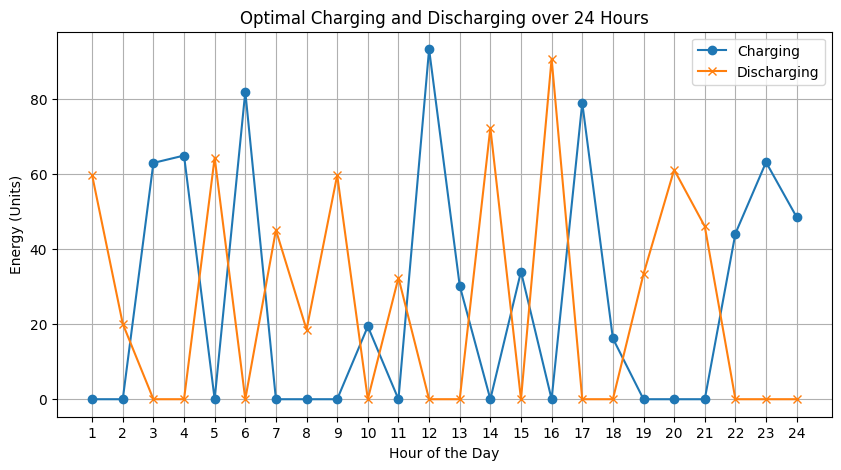

In [ ]:
import matplotlib.pyplot as plt

hours = np.arange(1, 25)  # Array representing each hour of the day

plt.figure(figsize=(10, 5))
plt.plot(hours, charge, label='Charging', marker='o')
plt.plot(hours, discharge, label='Discharging', marker='x')
plt.title('Optimal Charging and Discharging over 24 Hours')
plt.xlabel('Hour of the Day')
plt.ylabel('Energy (Units)')
plt.xticks(hours)  # Ensure all hours are labeled
plt.grid(True)
plt.legend()
plt.show()
